### **PREDICCIÓN DE CONVERSIÓN EN CAMPAÑAS DE MARKETING DIGITAL CON MACHINE LEARNING**

### **Análisis campaña de conversión**

### **INSTALL**

In [16]:
#!pip install imbalanced-learn
#!pip install shap

### **IMPORTS**

In [17]:
# === Standard Libraries ===
import re  # Trabajo con expresiones regulares
import math  # Funciones matemáticas
import warnings  # Manejo de advertencias

# === Data Manipulation and Analysis ===
import pandas as pd  # Manejo y análisis de datos estructurados
import numpy as np  # Operaciones numéricas y manejo de arrays

# === Visualization ===
import matplotlib.pyplot as plt  # Creación de gráficos básicos
from mpl_toolkits.mplot3d import Axes3D  # Gráficos 3D
import seaborn as sns  # Gráficos estadísticos y estilos
sns.set_style('whitegrid')  # Estilo de gráficos para seaborn

# === Model Selection and Preprocessing ===
from sklearn.model_selection import (
    train_test_split,  # División de datos en conjuntos de entrenamiento y prueba
    GridSearchCV,  # Búsqueda de hiperparámetros con validación cruzada
    StratifiedKFold,  # Validación cruzada estratificada
 RandomizedSearchCV # Búsqueda de hiperparámetros aleatoria con validación cruzada
 )

from sklearn.preprocessing import (
    StandardScaler,  # Escalado de características
    LabelEncoder  # Codificación de etiquetas categóricas
)

# === Pipeline ===
from sklearn.pipeline import Pipeline  # Construcción de pipelines para preprocesamiento y modelado

# === Class Imbalance Handling ===
from imblearn.combine import SMOTETomek  # SMOTE + Tomek Links para balanceo de datos
from imblearn.over_sampling import SMOTE  # SMOTE para sobremuestreo

# === Machine Learning Models ===
from sklearn.ensemble import (
    RandomForestClassifier,  # Clasificador Random Forest
    GradientBoostingClassifier,  # Clasificador Gradient Boosting
    StackingClassifier,  # Clasificador basado en apilamiento
    RandomForestRegressor,  # Regresor Random Forest
    GradientBoostingRegressor  # Regresor Gradient Boosting
)
from xgboost import XGBClassifier, XGBRegressor  # Clasificador y regresor XGBoost
import xgboost as xgb  # Alias para usar modelos XGBoost fácilmente

# === Metrics and Evaluation ===
from sklearn.metrics import (
    classification_report,  # Reporte de métricas para clasificación
    confusion_matrix,  # Matriz de confusión
    roc_auc_score,  # Métrica AUC-ROC
    f1_score,  # F1-Score
    recall_score,  # Recall (Sensibilidad)
    precision_score,  # Precisión
    mean_absolute_error,  # MAE (Error absoluto medio) para regresión
    mean_squared_error  # MSE (Error cuadrático medio) para regresión
)

# === Clustering ===
from sklearn.cluster import KMeans  # Algoritmo de clustering K-Means
from sklearn.metrics import (
    silhouette_samples,  # Evaluación de silueta para cada punto
    silhouette_score  # Puntuación general de silueta para el modelo
)

# === Dimensionality Reduction ===
from sklearn.decomposition import PCA  # Análisis de componentes principales (PCA)

# === Utilities ===
from sklearn.utils.class_weight import compute_class_weight  # Cálculo de pesos para clases desbalanceadas
import joblib  # Guardar y cargar modelos entrenados

# Limpieza de redundancias y organización:
# - Se añadió explícitamente `XGBClassifier` para destacar su uso.
# - Se eliminó duplicación de módulos.
# - Estructura clara por categorías.
from sklearn.metrics import ConfusionMatrixDisplay


### **CONFIGURACIONES**

In [18]:
# Mostrar todas las columnas de un DataFrame
pd.set_option('display.max_columns', None)

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **CARGA DE DATOS Y PRIMERAS EXPLORACIONES**

In [19]:
# Cargar los datos
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

In [20]:
# Filtrar el DataFrame para obtener solo las filas donde CampaignType es "Awareness"
df = df[df['CampaignType'] == 'Awareness']

In [21]:
df.head(100)

CustomerID  Age  Gender  Income CampaignChannel CampaignType  \
0          8000   56  Female  136912    Social Media    Awareness   
2          8002   46  Female   88456             PPC    Awareness   
5          8005   25  Female   42925    Social Media    Awareness   
6          8006   38  Female   25615        Referral    Awareness   
9          8009   40    Male  130764    Social Media    Awareness   
..          ...  ...     ...     ...             ...          ...   
396        8396   35  Female  146913    Social Media    Awareness   
398        8398   59  Female  133769           Email    Awareness   
404        8404   67    Male   29868        Referral    Awareness   
415        8415   57    Male   65330           Email    Awareness   
421        8421   46  Female   76869             PPC    Awareness   

         AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0    6497.870068          0.043919        0.088031              0   
2    1546.429596          0.277490        0.076423              2   
5    9579.388247          0.153795        0.161316              6   
6    7302.899852          0.040975        0.060977             42   
9    6229.193333          0.066641        0.169786             22   
..           ...               ...             ...            ...   
396   210.262007          0.174819        0.020410             33   
398   401.943958          0.217386        0.078079             27   
404  2299.784089          0.212732        0.137878             45   
415  5088.592224          0.275389        0.071907              3   
421  6524.094140          0.211720        0.132205             25   

     PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
0         2.399017    7.396803            19           6            9   
2         8.223619   13.794901             0          11            2   
5         2.125850    7.752831            95           5            8   
6         1.753995   10.698672            54          14            3   
9         1.135665    4.613312            14           8            4   
..             ...         ...           ...         ...          ...   
396       7.889953    3.340112            80          12            1   
398       1.676029    7.687621            66          16            8   
404       8.035461    5.457048            92          12            3   
415       6.173991   14.424037            72           0            6   
421       4.653684    6.952351             5           9            4   

     PreviousPurchases  LoyaltyPoints AdvertisingPlatform AdvertisingTool  \
0                    4            688            IsConfid      ToolConfid   
2                    8           2337            IsConfid      ToolConfid   
5                    0           3316            IsConfid      ToolConfid   
6                    6            930            IsConfid      ToolConfid   
9                    8           3789            IsConfid      ToolConfid   
..                 ...            ...                 ...             ...   
396                  9           2392            IsConfid      ToolConfid   
398                  2           2107            IsConfid      ToolConfid   
404                  7           4764            IsConfid      ToolConfid   
415                  3           3890            IsConfid      ToolConfid   
421                  2             10            IsConfid      ToolConfid   

     Conversion  
0             1  
2             1  
5             1  
6             1  
9             1  
..          ...  
396           1  
398           1  
404           1  
415           1  
421           1  

[100 rows x 20 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1988 non-null   int64  
 1   Age                  1988 non-null   int64  
 2   Gender               1988 non-null   object 
 3   Income               1988 non-null   int64  
 4   CampaignChannel      1988 non-null   object 
 5   CampaignType         1988 non-null   object 
 6   AdSpend              1988 non-null   float64
 7   ClickThroughRate     1988 non-null   float64
 8   ConversionRate       1988 non-null   float64
 9   WebsiteVisits        1988 non-null   int64  
 10  PagesPerVisit        1988 non-null   float64
 11  TimeOnSite           1988 non-null   float64
 12  SocialShares         1988 non-null   int64  
 13  EmailOpens           1988 non-null   int64  
 14  EmailClicks          1988 non-null   int64  
 15  PreviousPurchases    1988 non-null   int64 

In [23]:
df.describe()

CustomerID          Age         Income      AdSpend  \
count   1988.000000  1988.000000    1988.000000  1988.000000   
mean   12014.401408    42.931590   85206.945674  5069.338947   
std     2332.008632    14.940255   37471.704303  2808.011049   
min     8000.000000    18.000000   20059.000000   100.668227   
25%    10012.750000    30.000000   52229.000000  2675.445226   
50%    11968.000000    42.000000   86135.500000  5055.898513   
75%    14061.750000    56.000000  117447.750000  7416.524595   
max    15999.000000    69.000000  149985.000000  9997.002376   

       ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
count       1988.000000     1988.000000    1988.000000    1988.000000   
mean           0.155764        0.104372      24.759557       5.624965   
std            0.083704        0.054690      14.263836       2.600316   
min            0.010005        0.010100       0.000000       1.001882   
25%            0.084457        0.057045      12.000000       3.356355   
50%            0.155440        0.103254      25.000000       5.727663   
75%            0.229090        0.152712      37.000000       7.866689   
max            0.299968        0.199992      49.000000       9.995795   

        TimeOnSite  SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count  1988.000000   1988.000000  1988.000000  1988.000000        1988.000000   
mean      7.762745     50.501509     9.487928     4.402918           4.370221   
std       4.221346     29.078370     5.645041     2.849722           2.874275   
min       0.501684      0.000000     0.000000     0.000000           0.000000   
25%       4.293618     25.000000     5.000000     2.000000           2.000000   
50%       7.532998     51.000000    10.000000     4.000000           4.000000   
75%      11.444896     76.000000    14.000000     7.000000           7.000000   
max      14.995026     99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    1988.000000  1988.000000  
mean     2502.743964     0.855634  
std      1443.912232     0.351549  
min         0.000000     0.000000  
25%      1252.000000     1.000000  
50%      2527.500000     1.000000  
75%      3724.250000     1.000000  
max      4998.000000     1.000000

In [24]:
# Iterar por cada columna y obtener los valores únicos
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar los valores únicos de cada columna
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {values}")
    print("-" * 50)

Columna: CustomerID
Valores únicos: [ 8000  8002  8005 ... 15994 15995 15999]
--------------------------------------------------
Columna: Age
Valores únicos: [56 46 25 38 40 28 53 57 41 66 59 45 33 26 19 64 61 35 51 31 62 32 24 50
 22 65 18 52 54 68 21 49 39 23 69 36 42 37 44 20 67 30 29 43 47 60 58 48
 55 63 27 34]
--------------------------------------------------
Columna: Gender
Valores únicos: ['Female' 'Male']
--------------------------------------------------
Columna: Income
Valores únicos: [136912  88456  42925 ... 124883  24849  93002]
--------------------------------------------------
Columna: CampaignChannel
Valores únicos: ['Social Media' 'PPC' 'Referral' 'SEO' 'Email']
--------------------------------------------------
Columna: CampaignType
Valores únicos: ['Awareness']
--------------------------------------------------
Columna: AdSpend
Valores únicos: [6497.87006842 1546.4295958  9579.38824678 ... 7875.37263267 8518.30857478
 7743.6270702 ]
--------------------------------

In [25]:
df.nunique()

CustomerID             1988
Age                      52
Gender                    2
Income                 1977
CampaignChannel           5
CampaignType              1
AdSpend                1988
ClickThroughRate       1988
ConversionRate         1988
WebsiteVisits            50
PagesPerVisit          1988
TimeOnSite             1988
SocialShares            100
EmailOpens               20
EmailClicks              10
PreviousPurchases        10
LoyaltyPoints          1657
AdvertisingPlatform       1
AdvertisingTool           1
Conversion                2
dtype: int64

In [26]:
# Iterar por cada columna y mostrar los value_counts
for col in df.columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("-" * 50)


Columna: CustomerID
CustomerID
15999    1
8000     1
8002     1
8005     1
15941    1
        ..
8015     1
8014     1
8013     1
8011     1
8009     1
Name: count, Length: 1988, dtype: int64
--------------------------------------------------
Columna: Age
Age
49    59
62    50
66    48
40    48
46    47
32    47
31    46
35    46
34    46
19    45
25    44
64    44
18    44
30    44
39    44
21    44
42    43
52    43
41    42
28    42
54    42
26    41
33    40
43    39
45    39
29    38
58    38
61    37
20    37
37    37
23    37
68    36
38    36
51    34
60    34
22    34
53    33
59    33
69    32
57    32
67    32
55    31
63    30
47    29
65    29
56    28
50    28
36    28
48    28
44    28
24    26
27    26
Name: count, dtype: int64
--------------------------------------------------
Columna: Gender
Gender
Female    1213
Male       775
Name: count, dtype: int64
--------------------------------------------------
Columna: Income
Income
77255    2
70998    2
45992    2
23323    

### **LIMPIEZA DE DATOS**

In [27]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'])

### **EDA**

C:\Users\mikel\AppData\Local\Temp\ipykernel_15432\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
C:\Users\mikel\AppData\Local\Temp\ipykernel_15432\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
C:\Users\mikel\AppData\Local\Temp\ipykernel_15432\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)


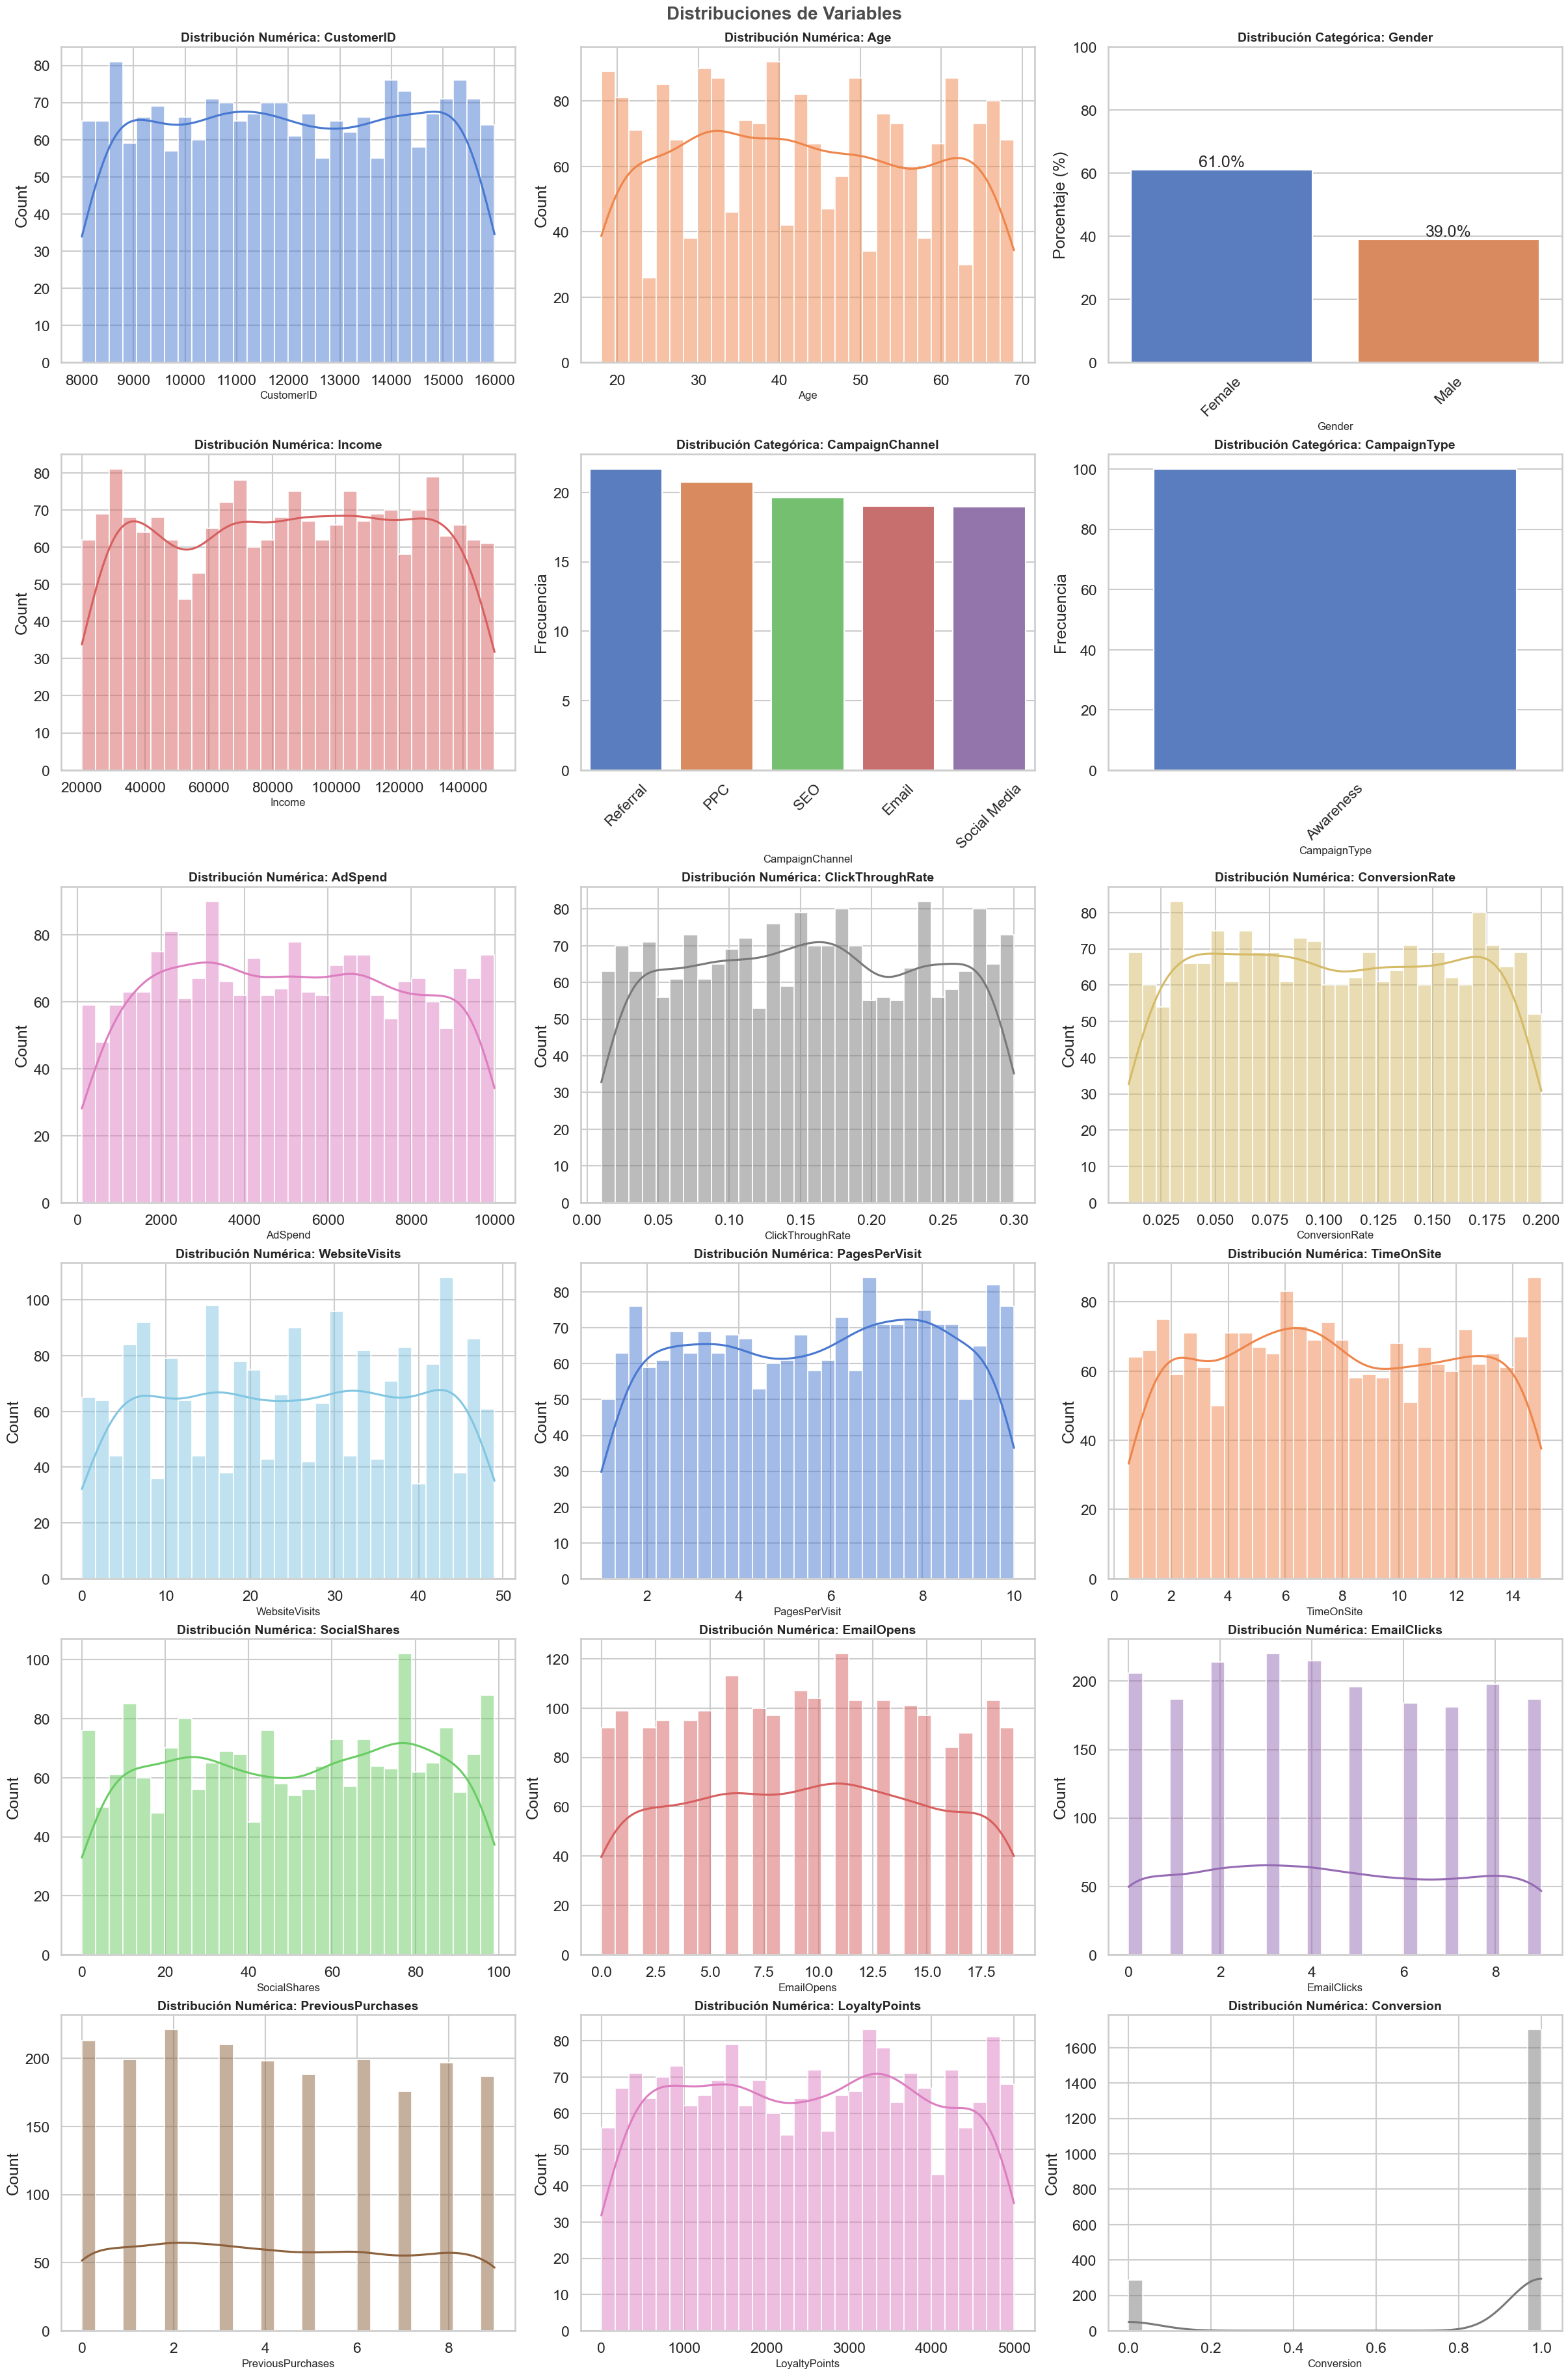

In [30]:
# Configuración general
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Número de columnas por fila
columns_per_row = 3

# Número total de columnas
total_columns = len(df.columns)

# Número de filas necesarias
rows = math.ceil(total_columns / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Colores personalizados
palette = sns.color_palette("muted")

# Visualizar cada columna
for i, column in enumerate(df.columns):
    ax = axes[i]
    if df[column].dtype in ['int64', 'float64']:
        # Variables numéricas
        sns.histplot(df[column], kde=True, bins=30, ax=ax, color=palette[i % len(palette)])
        ax.set_title(f'Distribución Numérica: {column}', fontsize=14, fontweight='bold')
    elif df[column].dtype == 'object' or df[column].dtype == 'bool':
        # Variables categóricas
        value_counts = df[column].value_counts(normalize=True) * 100  # Porcentajes
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
        ax.set_title(f'Distribución Categórica: {column}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Porcentaje (%)' if column == "Gender" else 'Frecuencia')
        ax.set_ylim(0, 100 if column == "Gender" else None)
        
        # Agregar etiquetas de porcentaje solo para 'Gender'
        if column == "Gender":
            for container in ax.containers:
                ax.bar_label(container, fmt='%.1f%%')
        
        ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column, fontsize=12)

# Ajustar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Distribuciones de Variables', fontsize=20, fontweight='bold', color="#4c4c4c", y=1.01)

plt.show()

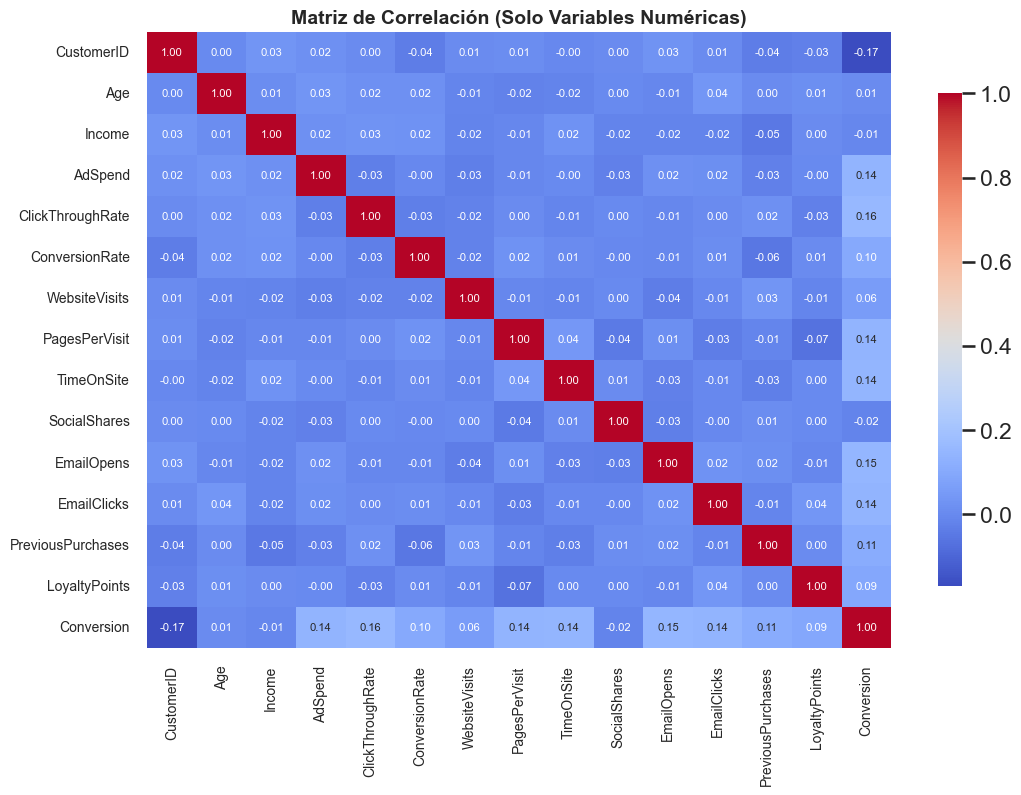

In [32]:
# Seleccionar solo columnas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mapa de calor con texto y números más pequeños
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8},  # Tamaño del texto en los números
    cbar_kws={"shrink": 0.8}  # Reducir la barra de color
)
plt.title('Matriz de Correlación (Solo Variables Numéricas)', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

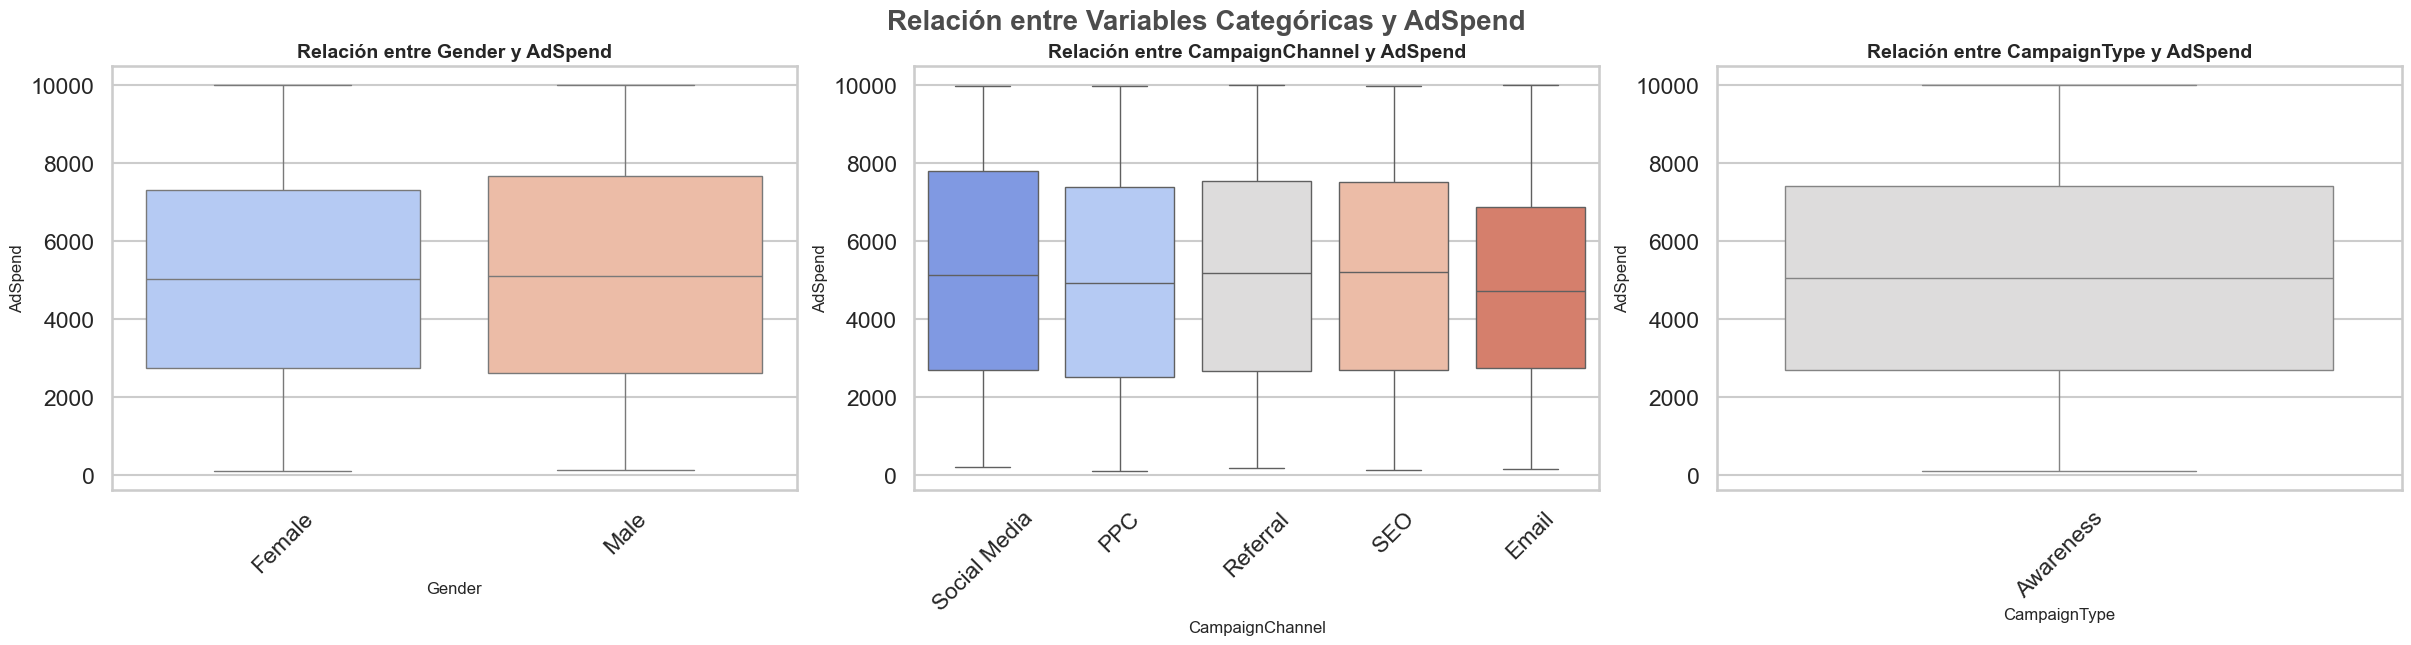

In [33]:
# Variables categóricas a explorar
categorical_vars = ['Gender', 'CampaignChannel', 'CampaignType']

# Variable numérica a analizar
numeric_var = 'AdSpend'

# Número de gráficos por fila
columns_per_row = 3

# Número total de variables categóricas
total_variables = len(categorical_vars)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Generar boxplots
for i, cat_var in enumerate(categorical_vars):
    sns.boxplot(data=df, x=cat_var, y=numeric_var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Relación entre {cat_var} y {numeric_var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel(numeric_var, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Relación entre Variables Categóricas y AdSpend', fontsize=20, fontweight='bold', color='#4c4c4c', y=1.05)

plt.show()

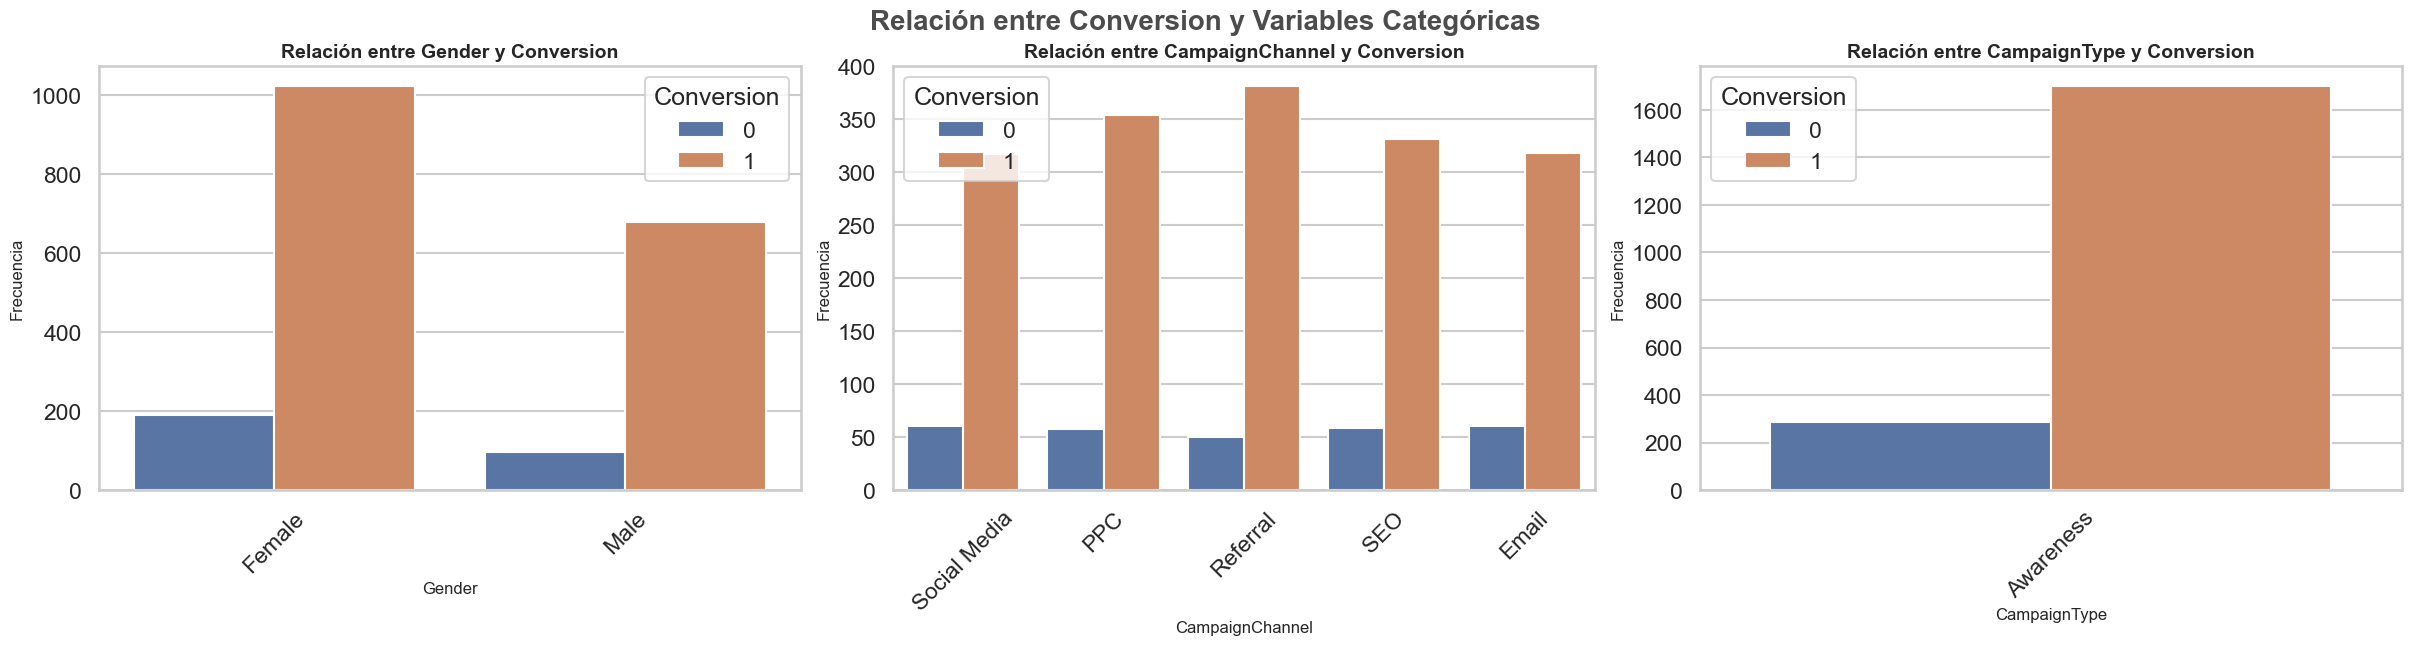

In [34]:
# Variables categóricas a explorar
categorical_vars = ['Gender', 'CampaignChannel', 'CampaignType']

# Número de gráficos por fila
columns_per_row = 3

# Número total de variables categóricas
total_variables = len(categorical_vars)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Generar countplots
for i, cat_var in enumerate(categorical_vars):
    sns.countplot(data=df, x=cat_var, hue='Conversion', ax=axes[i])
    axes[i].set_title(f'Relación entre {cat_var} y Conversion', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Relación entre Conversion y Variables Categóricas', fontsize=20, fontweight='bold', color='#4c4c4c', y=1.05)

plt.show()



In [35]:
# Columnas categóricas a codificar
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Convertir todos los valores True/False a 1/0 en el DataFrame
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else 0 if x is False else x)

In [36]:
# Verificar las nuevas columnas codificadas
df_encoded.head()

CustomerID  Age  Income      AdSpend  ClickThroughRate  ConversionRate  \
0        8000   56  136912  6497.870068          0.043919        0.088031   
2        8002   46   88456  1546.429596          0.277490        0.076423   
5        8005   25   42925  9579.388247          0.153795        0.161316   
6        8006   38   25615  7302.899852          0.040975        0.060977   
9        8009   40  130764  6229.193333          0.066641        0.169786   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  \
0              0       2.399017    7.396803            19           6   
2              2       8.223619   13.794901             0          11   
5              6       2.125850    7.752831            95           5   
6             42       1.753995   10.698672            54          14   
9             22       1.135665    4.613312            14           8   

   EmailClicks  PreviousPurchases  LoyaltyPoints  Conversion  Gender_Female  \
0            9                  4            688           1              1   
2            2                  8           2337           1              1   
5            8                  0           3316           1              1   
6            3                  6            930           1              1   
9            4                  8           3789           1              0   

   Gender_Male  CampaignChannel_Email  CampaignChannel_PPC  \
0            0                      0                    0   
2            0                      0                    1   
5            0                      0                    0   
6            0                      0                    0   
9            1                      0                    0   

   CampaignChannel_Referral  CampaignChannel_SEO  \
0                         0                    0   
2                         0                    0   
5                         0                    0   
6                         1                    0   
9                         0                    0   

   CampaignChannel_Social Media  CampaignType_Awareness  
0                             1                       1  
2                             0                       1  
5                             1                       1  
6                             0                       1  
9                             1                       1

In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    1988 non-null   int64  
 1   Age                           1988 non-null   int64  
 2   Income                        1988 non-null   int64  
 3   AdSpend                       1988 non-null   float64
 4   ClickThroughRate              1988 non-null   float64
 5   ConversionRate                1988 non-null   float64
 6   WebsiteVisits                 1988 non-null   int64  
 7   PagesPerVisit                 1988 non-null   float64
 8   TimeOnSite                    1988 non-null   float64
 9   SocialShares                  1988 non-null   int64  
 10  EmailOpens                    1988 non-null   int64  
 11  EmailClicks                   1988 non-null   int64  
 12  PreviousPurchases             1988 non-null   int64  
 13  LoyaltyP

In [38]:
df_encoded.describe()

CustomerID          Age         Income      AdSpend  \
count   1988.000000  1988.000000    1988.000000  1988.000000   
mean   12014.401408    42.931590   85206.945674  5069.338947   
std     2332.008632    14.940255   37471.704303  2808.011049   
min     8000.000000    18.000000   20059.000000   100.668227   
25%    10012.750000    30.000000   52229.000000  2675.445226   
50%    11968.000000    42.000000   86135.500000  5055.898513   
75%    14061.750000    56.000000  117447.750000  7416.524595   
max    15999.000000    69.000000  149985.000000  9997.002376   

       ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
count       1988.000000     1988.000000    1988.000000    1988.000000   
mean           0.155764        0.104372      24.759557       5.624965   
std            0.083704        0.054690      14.263836       2.600316   
min            0.010005        0.010100       0.000000       1.001882   
25%            0.084457        0.057045      12.000000       3.356355   
50%            0.155440        0.103254      25.000000       5.727663   
75%            0.229090        0.152712      37.000000       7.866689   
max            0.299968        0.199992      49.000000       9.995795   

        TimeOnSite  SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count  1988.000000   1988.000000  1988.000000  1988.000000        1988.000000   
mean      7.762745     50.501509     9.487928     4.402918           4.370221   
std       4.221346     29.078370     5.645041     2.849722           2.874275   
min       0.501684      0.000000     0.000000     0.000000           0.000000   
25%       4.293618     25.000000     5.000000     2.000000           2.000000   
50%       7.532998     51.000000    10.000000     4.000000           4.000000   
75%      11.444896     76.000000    14.000000     7.000000           7.000000   
max      14.995026     99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  Gender_Female  Gender_Male  \
count    1988.000000  1988.000000    1988.000000  1988.000000   
mean     2502.743964     0.855634       0.610161     0.389839   
std      1443.912232     0.351549       0.487836     0.487836   
min         0.000000     0.000000       0.000000     0.000000   
25%      1252.000000     1.000000       0.000000     0.000000   
50%      2527.500000     1.000000       1.000000     0.000000   
75%      3724.250000     1.000000       1.000000     1.000000   
max      4998.000000     1.000000       1.000000     1.000000   

       CampaignChannel_Email  CampaignChannel_PPC  CampaignChannel_Referral  \
count            1988.000000          1988.000000               1988.000000   
mean                0.190141             0.207243                  0.216801   
std                 0.392511             0.405433                  0.412169   
min                 0.000000             0.000000                  0.000000   
25%                 0.000000             0.000000                  0.000000   
50%                 0.000000             0.000000                  0.000000   
75%                 0.000000             0.000000                  0.000000   
max                 1.000000             1.000000                  1.000000   

       CampaignChannel_SEO  CampaignChannel_Social Media  \
count          1988.000000                   1988.000000   
mean              0.196177                      0.189638   
std               0.397204                      0.392113   
min               0.000000                      0.000000   
25%               0.000000                      0.000000   
50%               0.000000                      0.000000   
75%               0.000000                      0.000000   
max               1.000000                      1.000000   

       CampaignType_Awareness  
count                  1988.0  
mean                      1.0  
std                       0.0  
min                       1.0  
25%                       1.0  
50%          

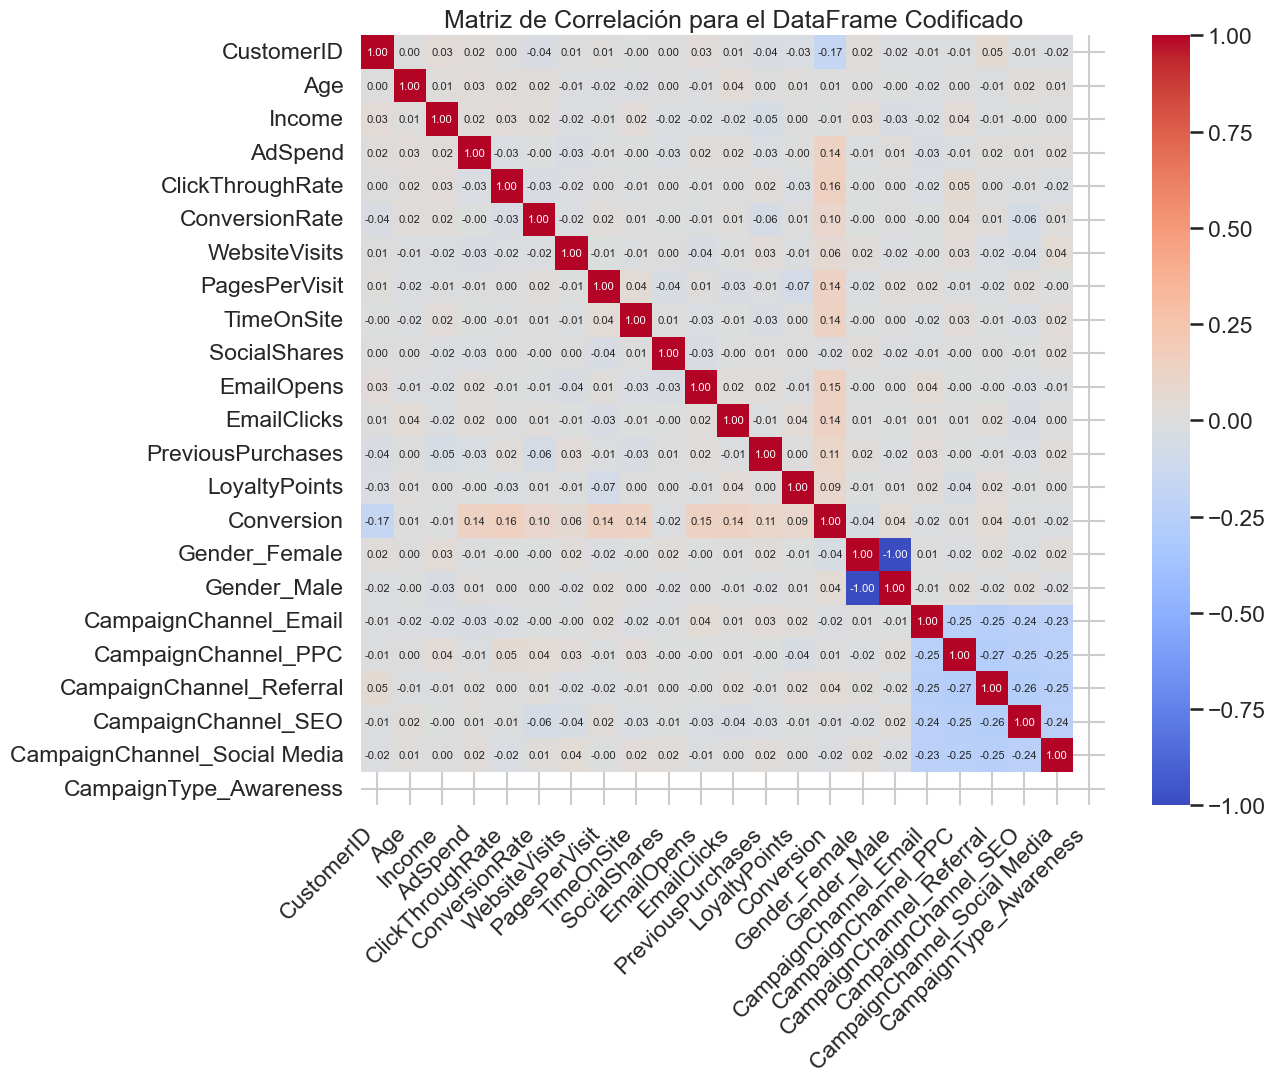

In [39]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con números
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 8}
)

# Rotar las etiquetas del eje X 45 grados
plt.xticks(rotation=45, ha='right')  # ha='right' para alinearlas a la derecha
plt.title('Matriz de Correlación para el DataFrame Codificado')
plt.show()

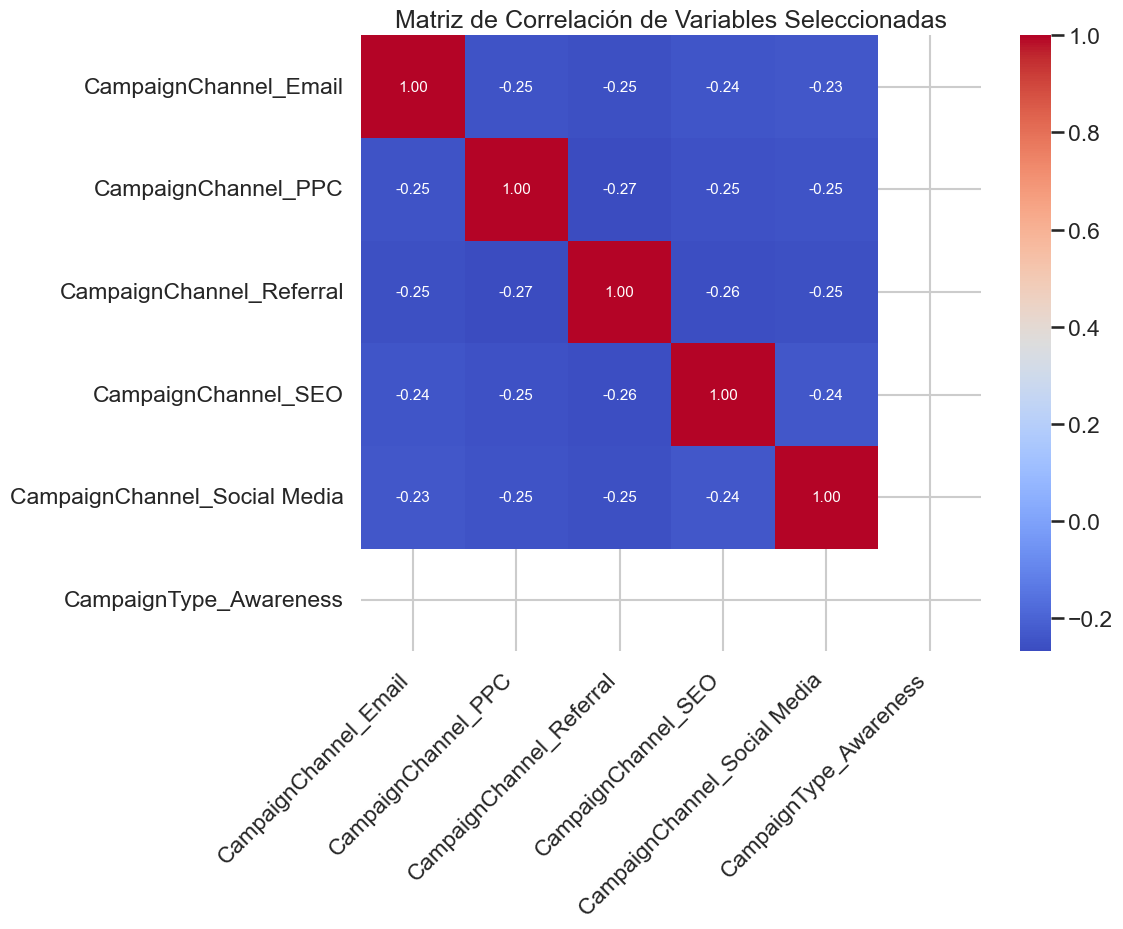

In [43]:
# Seleccionar las columnas específicas
selected_columns = [
    'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral',
    'CampaignChannel_SEO', 'CampaignChannel_Social Media',
    'CampaignType_Awareness'
]

# Filtrar el DataFrame para incluir solo estas columnas
filtered_df = df_encoded[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = filtered_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 11}
)

# Rotar las etiquetas del eje X 45 grados
plt.xticks(rotation=45, ha='right')  # Girar etiquetas y alinearlas a la derecha
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()



C:\Users\mikel\AppData\Local\Temp\ipykernel_15432\575013554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Conversion'] = df_encoded['Conversion']  # Añadir la variable objetivo


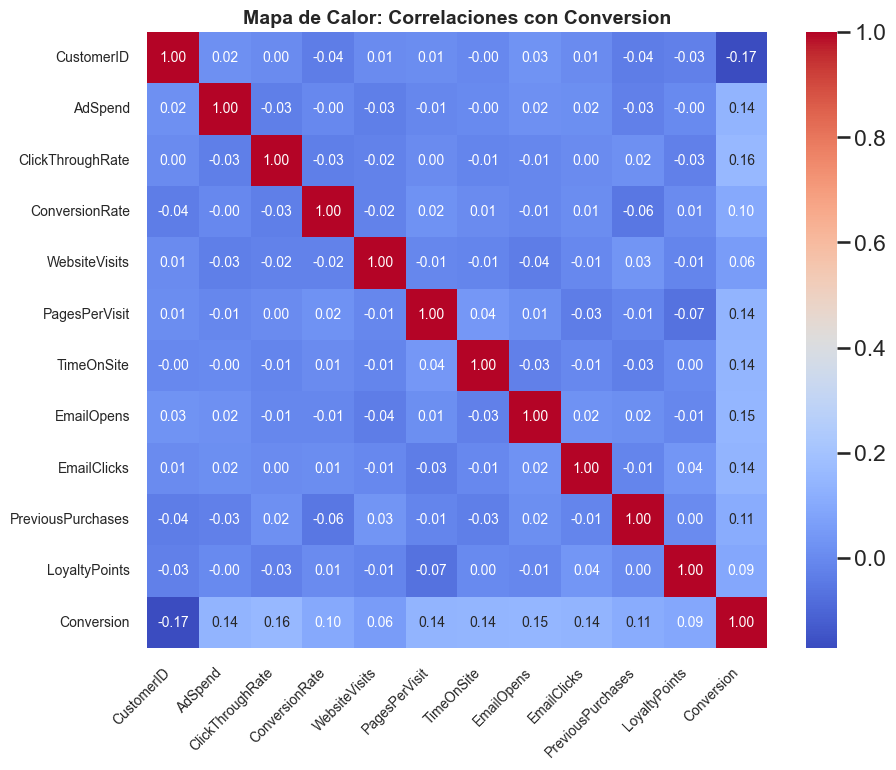

In [44]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Seleccionar las correlaciones con la variable objetivo 'Conversion'
correlations_with_target = correlation_matrix['Conversion'].drop('Conversion')

# Filtrar las variables con correlación
selected_features = correlations_with_target[abs(correlations_with_target) > 0.05].index

# Crear un DataFrame con las variables seleccionadas
df_filtered = df_encoded[selected_features]
df_filtered['Conversion'] = df_encoded['Conversion']  # Añadir la variable objetivo

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df_filtered.corr(),
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},  # Reducir el tamaño de los números
    cmap="coolwarm",
    cbar=True
)

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Mapa de Calor: Correlaciones con Conversion", fontsize=14, fontweight="bold")
plt.show()



c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


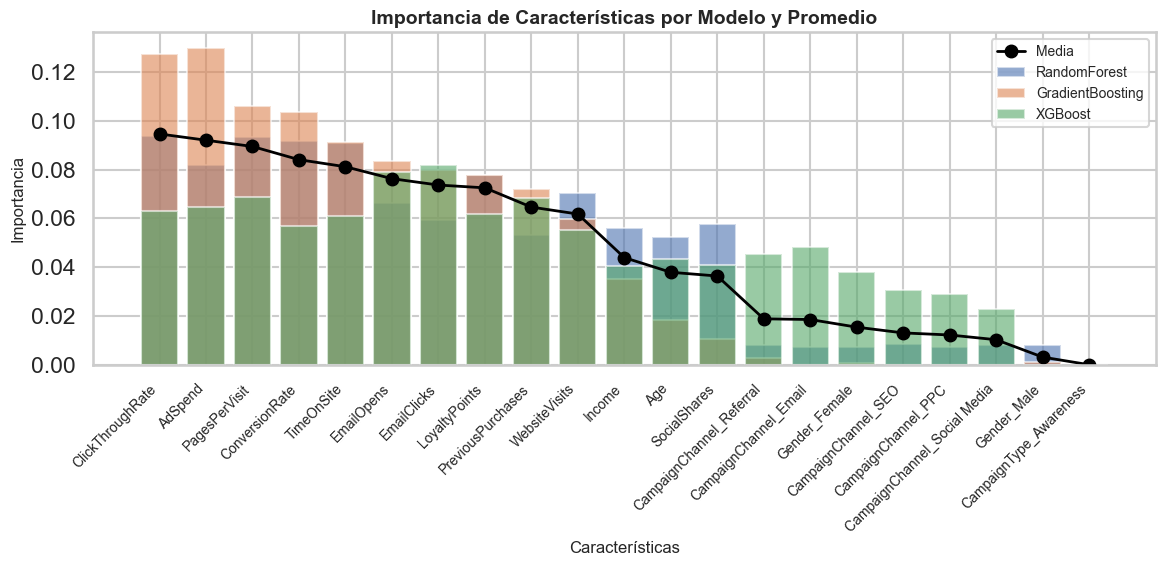

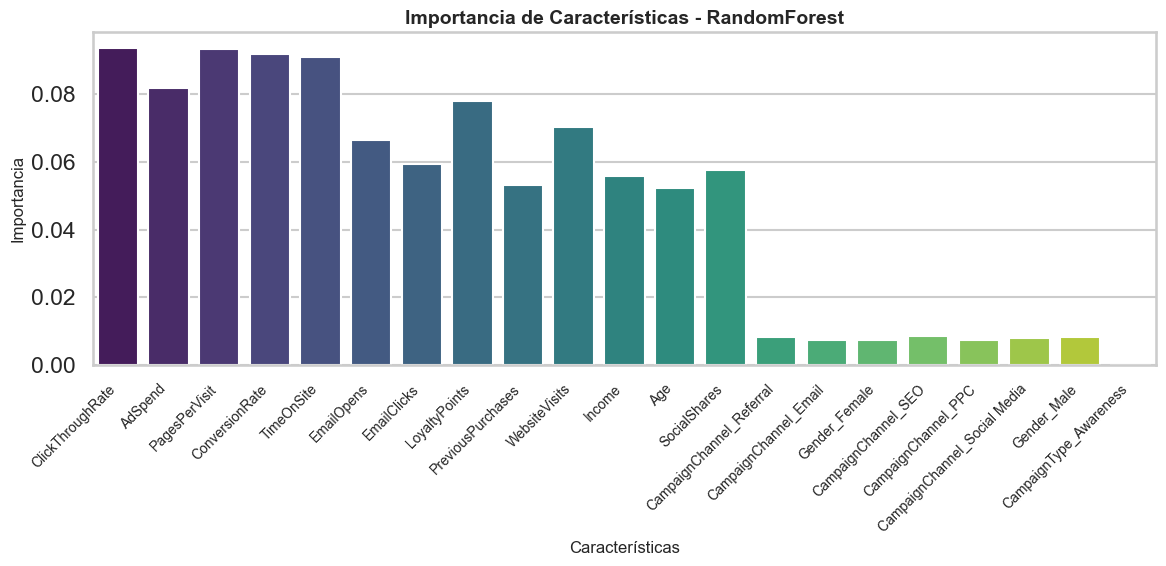

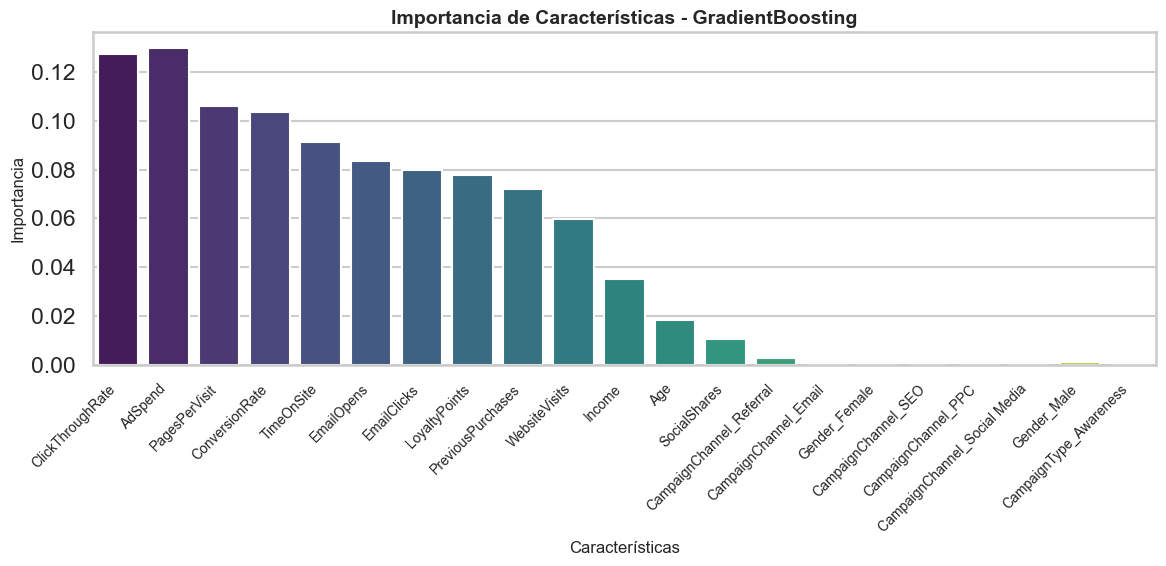

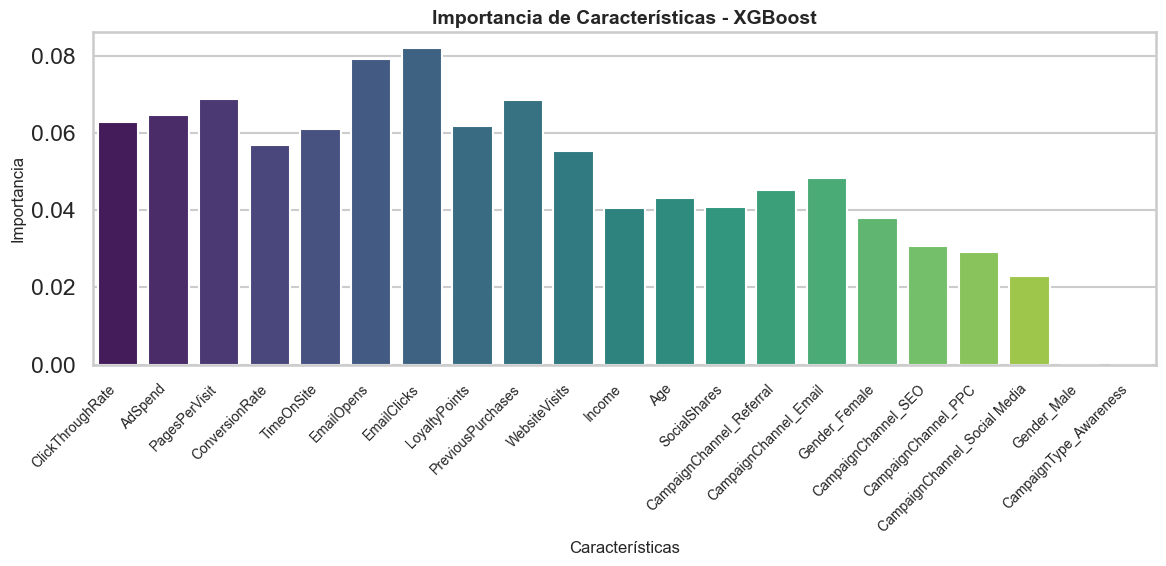

Tabla de Importancias:
                              RandomForest  GradientBoosting   XGBoost  \
ClickThroughRate                  0.093667          0.127325  0.062895   
AdSpend                           0.081832          0.129812  0.064553   
PagesPerVisit                     0.093455          0.106163  0.068849   
ConversionRate                    0.091830          0.103471  0.056950   
TimeOnSite                        0.091117          0.091403  0.061044   
EmailOpens                        0.066413          0.083365  0.079105   
EmailClicks                       0.059424          0.079665  0.081959   
LoyaltyPoints                     0.077904          0.077786  0.061912   
PreviousPurchases                 0.053196          0.072218  0.068496   
WebsiteVisits                     0.070358          0.059751  0.055266   
Income                            0.055882          0.035338  0.040544   
Age                               0.052251          0.018332  0.043152   
SocialShares   

In [45]:
# Variables predictoras y objetivo
X = df_encoded.drop(columns=['Conversion', 'CustomerID'])
y = df_encoded['Conversion']

# Modelos a usar
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Entrenar cada modelo y calcular importancia de características
importances_dict = {}
for model_name, model in models.items():
    model.fit(X, y)
    importances_dict[model_name] = model.feature_importances_

# Crear un DataFrame con las importancias
importances_df = pd.DataFrame(importances_dict, index=X.columns)

# Calcular la media de importancias
importances_df['Mean_Importance'] = importances_df.mean(axis=1)

# Ordenar por importancia media
importances_df = importances_df.sort_values(by='Mean_Importance', ascending=False)

# Gráfico combinado de importancias
plt.figure(figsize=(12, 6))

# Graficar las importancias de cada modelo
for model_name in models.keys():
    plt.bar(importances_df.index, importances_df[model_name], alpha=0.6, label=model_name)

# Graficar la media de importancias como una línea
plt.plot(importances_df['Mean_Importance'], color='black', marker='o', linestyle='-', linewidth=2, label='Media')

# Ajustar el gráfico combinado
plt.title('Importancia de Características por Modelo y Promedio', fontsize=14, fontweight='bold')
plt.xlabel('Características', fontsize=12)
plt.ylabel('Importancia', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# Gráficos individuales por modelo
for model_name in models.keys():
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=importances_df.index,
        y=importances_df[model_name],
        palette="viridis",
    )
    plt.title(f'Importancia de Características - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Características', fontsize=12)
    plt.ylabel('Importancia', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()
    plt.show()

# Mostrar la tabla de importancias
print("Tabla de Importancias:")
print(importances_df)


In [46]:
# Seleccionar características con importancia media > umbral
threshold = 0.03
selected_features = importances_df[importances_df['Mean_Importance'] > threshold].index

# Seleccionar características con importancia media > umbral
selected_features = importances_df[importances_df['Mean_Importance'] > threshold].index

# Seleccionar características descartadas con importancia media <= umbral
discarded_features = importances_df[importances_df['Mean_Importance'] <= threshold].index

# Mostrar las características seleccionadas y descartadas
print(f"Características seleccionadas:\n{selected_features}")
print(f"\nCaracterísticas descartadas:\n{discarded_features}")



Características seleccionadas:
Index(['ClickThroughRate', 'AdSpend', 'PagesPerVisit', 'ConversionRate',
       'TimeOnSite', 'EmailOpens', 'EmailClicks', 'LoyaltyPoints',
       'PreviousPurchases', 'WebsiteVisits', 'Income', 'Age', 'SocialShares'],
      dtype='object')

Características descartadas:
Index(['CampaignChannel_Referral', 'CampaignChannel_Email', 'Gender_Female',
       'CampaignChannel_SEO', 'CampaignChannel_PPC',
       'CampaignChannel_Social Media', 'Gender_Male',
       'CampaignType_Awareness'],
      dtype='object')


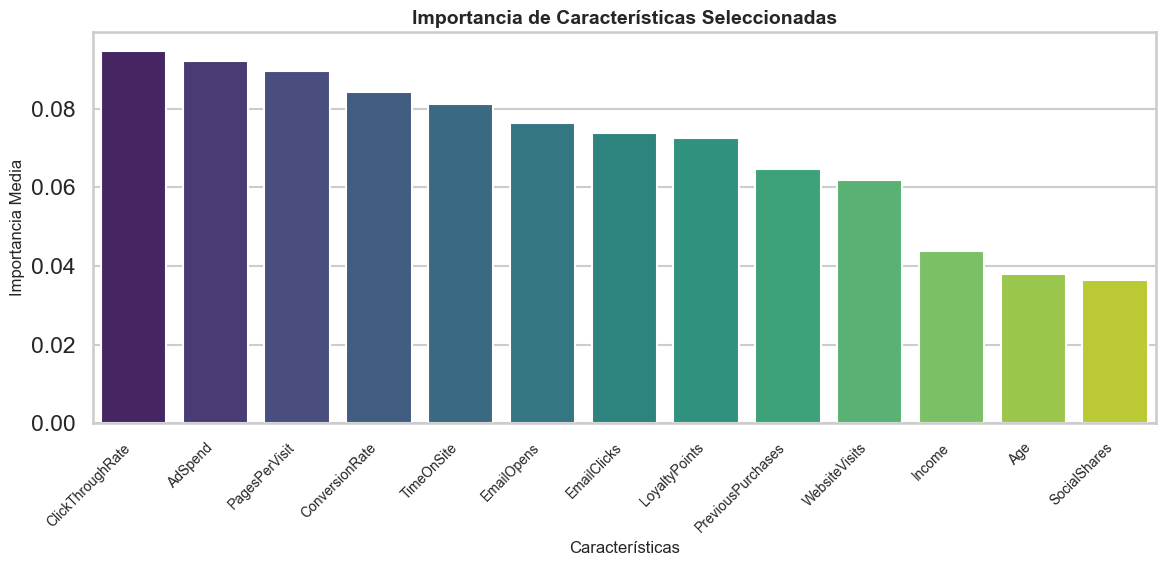

In [47]:
# Crear un DataFrame con las características seleccionadas y sus importancias
selected_features_df = importances_df.loc[selected_features]

# Graficar las características seleccionadas con sus importancias
plt.figure(figsize=(12, 6))
sns.barplot(
    x=selected_features_df.index,
    y=selected_features_df['Mean_Importance'],
    palette="viridis",
)

# Ajustes del gráfico
plt.title("Importancia de Características Seleccionadas", fontsize=14, fontweight="bold")
plt.xlabel("Características", fontsize=12)
plt.ylabel("Importancia Media", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


### **ANÁLISIS Y ESTRATEGIA PARA OPTIMIZACIÓN DE CAMPAÑAS Y CANALES**

---

#### **1. Análisis de la Campaña Actual**
El diseño de las campañas actuales revela una falta de enfoque estratégico en varios niveles, lo que reduce la efectividad de las iniciativas de marketing. Los principales problemas identificados son:

- **Campaña Generalista:**  
  Los esfuerzos de marketing no están segmentados ni adaptados a grupos específicos de clientes. Esto genera una asignación uniforme de recursos y un impacto limitado en la conversión de clientes potenciales.  

- **Distribución Ineficiente de Recursos (`AdSpend`):**  
  El presupuesto publicitario se reparte de manera homogénea entre hombres y mujeres, así como entre los diferentes canales publicitarios (`CampaignChannel`) y tipos de campañas (`CampaignType`). Esto implica que no se priorizan los canales o campañas que podrían ofrecer un mayor retorno de inversión (ROI).

- **Definición Amplia de Conversión:**  
  La conversión está definida de manera general como cualquier interacción deseada de marketing (como referencias, compras repetidas, entre otras). Esto dificulta identificar los factores específicos que impulsan cada tipo de conversión, diluyendo el enfoque de las estrategias.

---

#### **2. Oportunidad para Optimización**
La situación actual, aunque carece de enfoque específico, proporciona una valiosa oportunidad para:

- **Elaborar un Predictor de Conversiones:**  
  Aprovechando las características disponibles en el dataset, es posible construir un modelo predictivo que permita identificar los factores clave asociados con una mayor probabilidad de conversión.  
  Esto facilitará una segmentación más precisa y estrategias de marketing dirigidas.  

- **Segmentación Eficiente:**  
  Utilizar métricas relevantes para identificar grupos de clientes (como ingresos, comportamiento en el sitio web, interacción con correos electrónicos, entre otros) y diseñar campañas que respondan específicamente a sus necesidades.  

---

#### **3. Estrategia para Optimización**
Para optimizar las campañas, se propone lo siguiente:

1. **Segmentación Basada en Datos:**
   - Analizar variables como `Gender`, `CampaignChannel`, `CampaignType` y métricas de interacción (`ClickThroughRate`, `PagesPerVisit`) para identificar patrones que permitan agrupar a los clientes.
   - Priorizar recursos hacia segmentos con mayor probabilidad de conversión.

2. **Redefinir el Objetivo de Conversión:**
   - Dividir la conversión en categorías específicas (como compras repetidas, recomendaciones, interacción con anuncios) para crear predictores específicos para cada tipo de acción.

3. **Optimización de Recursos (`AdSpend`):**
   - Calcular la relación entre el gasto publicitario y las conversiones logradas en cada segmento. Ajustar el presupuesto para maximizar el ROI en canales y tipos de campañas con mejor desempeño.

4. **Canales Publicitarios Prioritarios:**
   - **`PPC`:** Orientar hacia clientes con ingresos altos para maximizar la probabilidad de compra.  
   - **`Referral`:** Enfocar en clientes leales con altas tasas de referencias para expandir la base de clientes.  
   - **`Social Media`:** Focalizar en usuarios jóvenes y comprometidos para generar conocimiento de marca.  

---

#### **4. Modelo Predictivo para Conversiones**
A partir de los datos disponibles, se identifican las siguientes variables clave que impulsan las conversiones:

1. **Variables de Comportamiento del Cliente:**
   - `ClickThroughRate`, `PagesPerVisit`, `TimeOnSite`, `SocialShares`.  

2. **Historial del Cliente:**
   - `PreviousPurchases`, `LoyaltyPoints`.

3. **Interacción con Email Marketing:**
   - `EmailOpens`, `EmailClicks`.

4. **Canales y Tipos de Campaña:**
   - `CampaignChannel` y `CampaignType` pueden ayudar a identificar la efectividad de cada estrategia.

---

#### **Conclusión**
El análisis y las estrategias propuestas permiten transformar una campaña generalista en un conjunto de iniciativas dirigidas y personalizadas. La clave está en:
- Segmentar a los clientes con base en su comportamiento y características específicas.
- Redefinir la conversión para entender mejor el impacto de las campañas.
- Optimizar la asignación de recursos (`AdSpend`) hacia los canales y tipos de campaña con mayor probabilidad de éxito.

Esto conducirá a un mejor retorno de inversión (ROI) y una mejora significativa en las tasas de conversión.


### **Métricas Clave**

#### **ClickThroughRate (CTR)**
El **ClickThroughRate (CTR)** mide el porcentaje de personas que hacen clic en un anuncio en relación con la cantidad de veces que el anuncio se muestra (impresiones). Es una métrica clave para evaluar la efectividad inicial de las campañas publicitarias.

**Fórmula:**  
CTR = (Número de clics / Número de impresiones) × 100

##### **Fórmulas Relacionadas:**
1. **Clics estimados:**  
   Clics = CTR × Impresiones totales

2. **Relación con ConversionRate:**  
   ConversionRate = (Conversiones / Clics) × 100

---

#### **ConversionRate**
El **ConversionRate** mide el porcentaje de clics que resultan en acciones deseadas (como compras, registros, etc.). Evalúa la efectividad de los clics en generar conversiones.

**Fórmula:**  
ConversionRate = (Conversiones / Total de clics) × 100

##### **Fórmulas Relacionadas:**
1. **Clics estimados:**  
   Clics = ClickThroughRate × Impresiones totales

2. **Conversiones estimadas:**  
   ConversionRate = Conversiones / Clics

---

#### **Return on Investment (ROI)**
El **ROI** evalúa la rentabilidad de las campañas, comparando los ingresos generados con los costos invertidos. Sin datos de ingresos o ventas, no es posible calcular el ROI en esta iteración del análisis.

**Fórmula (no calculada):**  
ROI = [(Ingresos - Costos) / Costos] × 100

---

### **Conclusión**

1. **ClickThroughRate (CTR):**  
   - El **CTR** ya está disponible en el dataset y es una métrica clave para evaluar la efectividad de los anuncios en generar clics.  
   - Aunque no podemos recalcularlo sin las impresiones, el valor ya proporcionado en el dataset es útil para análisis predictivos y modelos de Machine Learning, ya que ayuda a identificar patrones en el comportamiento de los usuarios y su interacción con las campañas.

2. **ConversionRate:**  
   - El **ConversionRate** también está disponible en el dataset y mide la efectividad de los clics en generar acciones deseadas (conversiones).  
   - Al igual que el CTR, esta métrica es crítica para entrenar modelos de Machine Learning que buscan optimizar campañas publicitarias o predecir el éxito de futuras estrategias.

3. **Return on Investment (ROI):**  
   - El ROI no puede calcularse debido a la falta de datos sobre ingresos o ventas generados por cada campaña o canal.  
   - Incorporar información sobre ingresos, costos por canal, o ventas permitiría evaluar la rentabilidad de las campañas y su optimización.

4. **Uso en Machine Learning:**  
   - Las métricas **CTR** y **ConversionRate** disponibles son particularmente útiles para modelos de Machine Learning, ya que proporcionan información cuantificable para predecir el comportamiento del cliente, optimizar el gasto publicitario y segmentar audiencias según su probabilidad de conversión.

---

### **Propuesta para Futuras Iteraciones**
Para un análisis más robusto y un cálculo completo del ROI, sería recomendable incluir en el dataset los siguientes datos:
- **Número de impresiones:** Para validar y calcular los clics reales desde el CTR.  
- **Número exacto de conversiones:** Para recalcular el ConversionRate en función de los clics.  
- **Ingresos generados por cada campaña o canal:** Para calcular el ROI y optimizar la rentabilidad.


# **PREDICTOR DE CONVERSIÓN**

In [48]:
# Variables predictoras y objetivo
X = df_encoded.drop(columns=['Conversion', 'CustomerID'])
y = df_encoded['Conversion']

# Configuración para mostrar todo el texto en DataFrames
pd.set_option('display.max_colwidth', None)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

# Modelos y parámetros
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier( random_state=42),
}

param_grids = {
    "RandomForest": {
        "classifier__n_estimators": [60, 80],
        "classifier__max_depth": [12, 14],
        "classifier__min_samples_split": [10, 12],
        "classifier__min_samples_leaf": [5, 6],
    },
    "GradientBoosting": {
        "classifier__n_estimators": [200, 250],
        "classifier__learning_rate": [0.05, 0.06],
        "classifier__max_depth": [3, 4],
        "classifier__subsample": [0.6, 0.7],
    },
    "XGBoost": {
        "classifier__n_estimators": [100, 125],
        "classifier__learning_rate": [0.06, 0.08],
        "classifier__max_depth": [4],
        "classifier__gamma": [0.5, 0.7],
        "classifier__reg_alpha": [1, 5],
        "classifier__reg_lambda": [5, 10],
        "classifier__subsample": [0.6, 0.7],
    },
}

# Almacenar resultados
all_results = []

# Crear pipelines y ajustar modelos
for model_name, model in models.items():
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),  # Escalado
            ("classifier", model),  # Modelo
        ]
    )

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        scoring="recall",
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        n_jobs=-1,
    )

    grid_search.fit(X_train_balanced, y_train_balanced)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_  # Obtener mejores parámetros
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Resultados
    recall_train = recall_score(y_train_balanced, best_model.predict(X_train_balanced))
    recall_test = recall_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Guardar modelo
    joblib.dump(best_model, f"{model_name}_best_model.pkl")

    # Guardar resultados
    all_results.append(
        {
            "Model": model_name,
            "Best Params": best_params,
            "Recall (Train)": recall_train,
            "Recall (Test)": recall_test,
            "Precision (Test)": precision_test,
            "F1-Score (Test)": f1_test,
            "ROC-AUC (Test)": roc_auc_test,
            "Confusion Matrix": cm,
        }
    )

# Mostrar resultados
df_results = pd.DataFrame(all_results)
print("\nResultados finales:")
print(df_results)

# Mostrar matrices de confusión
for result in all_results:
    print(f"\nMatriz de Confusión para {result['Model']}:")
    print(result['Confusion Matrix'])


Resultados finales:
              Model  \
0      RandomForest   
1  GradientBoosting   
2           XGBoost   

                                                                                                                                                                                                         Best Params  \
0                                                                              {'classifier__max_depth': 14, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 12, 'classifier__n_estimators': 80}   
1                                                                                     {'classifier__learning_rate': 0.06, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}   
2  {'classifier__gamma': 0.7, 'classifier__learning_rate': 0.08, 'classifier__max_depth': 4, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 1, 'classifier__reg_lambda': 5, 'classifier__subsample': 0.7}   

   Recall (Train)  Re

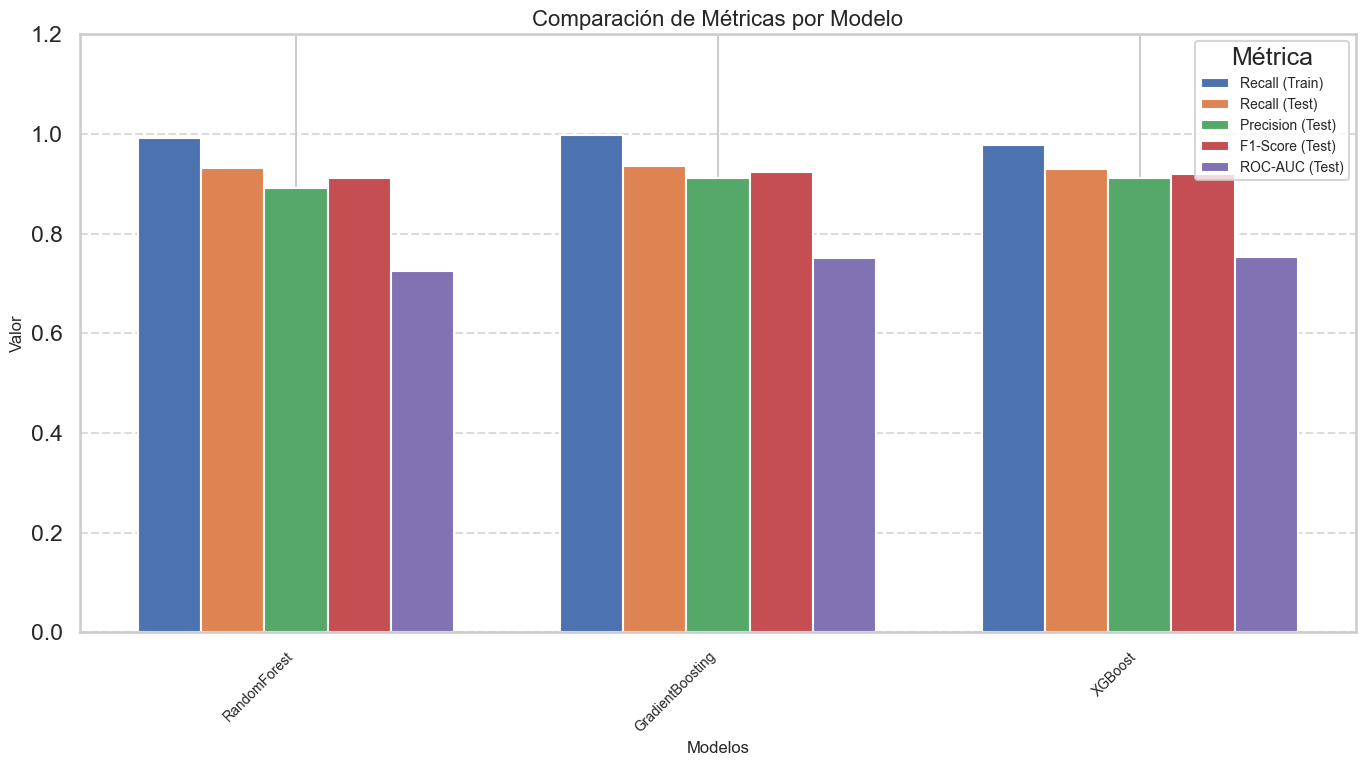

In [49]:
# --- Métricas y modelos ---
metrics = [
    "Recall (Train)", "Recall (Test)", 
    "Precision (Test)", "F1-Score (Test)", "ROC-AUC (Test)"
]
models = df_results["Model"]

# --- Datos ---
values = [df_results[metric].values for metric in metrics]
x = np.arange(len(models))  # Posiciones en X para los modelos
width = 0.15  # Ancho de cada barra

# --- Gráfico de barras ---
plt.figure(figsize=(14, 8))

# Añadir las barras para cada métrica
for i, (metric, metric_values) in enumerate(zip(metrics, values)):
    plt.bar(
        x + i * width,  # Desplazar barras
        metric_values,
        width=width,
        label=metric
    )

# Configuración del gráfico
plt.title("Comparación de Métricas por Modelo", fontsize=16)
plt.xlabel("Modelos", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(x + (len(metrics) - 1) * width / 2, models, rotation=45, ha="right", fontsize=10)
plt.ylim(0, 1.2)  # Ajustar límites del eje Y
plt.legend(title="Métrica", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


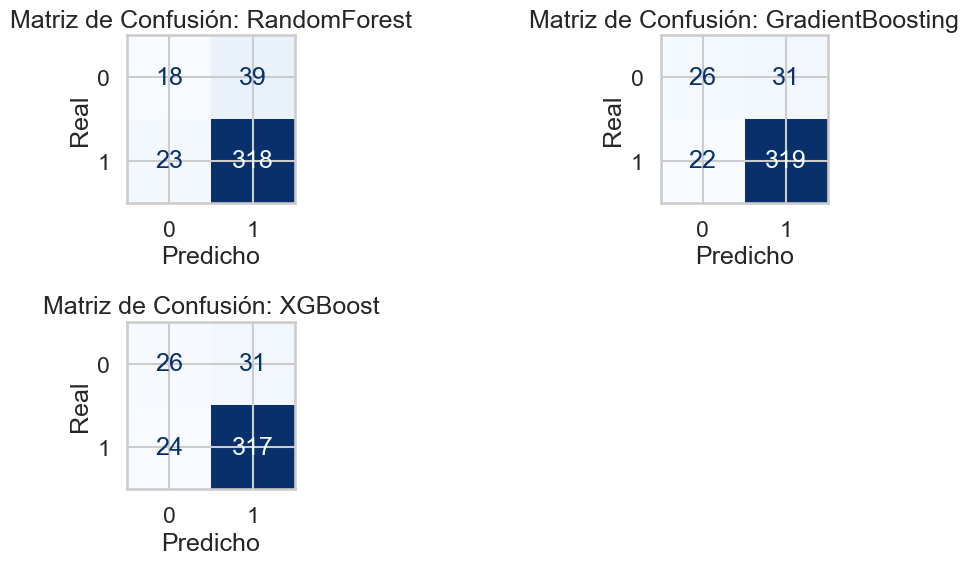

In [50]:
# --- Configuración de las matrices de confusión ---
fig, axes = plt.subplots(nrows=(len(all_results) + 1) // 2, ncols=2, figsize=(12, len(all_results) * 2))

for i, result in enumerate(all_results):
    model_name = result["Model"]
    cm = result["Confusion Matrix"]
    ax = axes[i // 2, i % 2]  # Elegir la posición de la matriz de confusión

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=False)

    ax.set_title(f"Matriz de Confusión: {model_name}")
    ax.set_xlabel("Predicho")  # Dejar vacío el eje X
    ax.set_ylabel("Real")  # Dejar vacío el eje Y

# Eliminar ejes vacíos si no hay un número par de modelos
if len(all_results) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

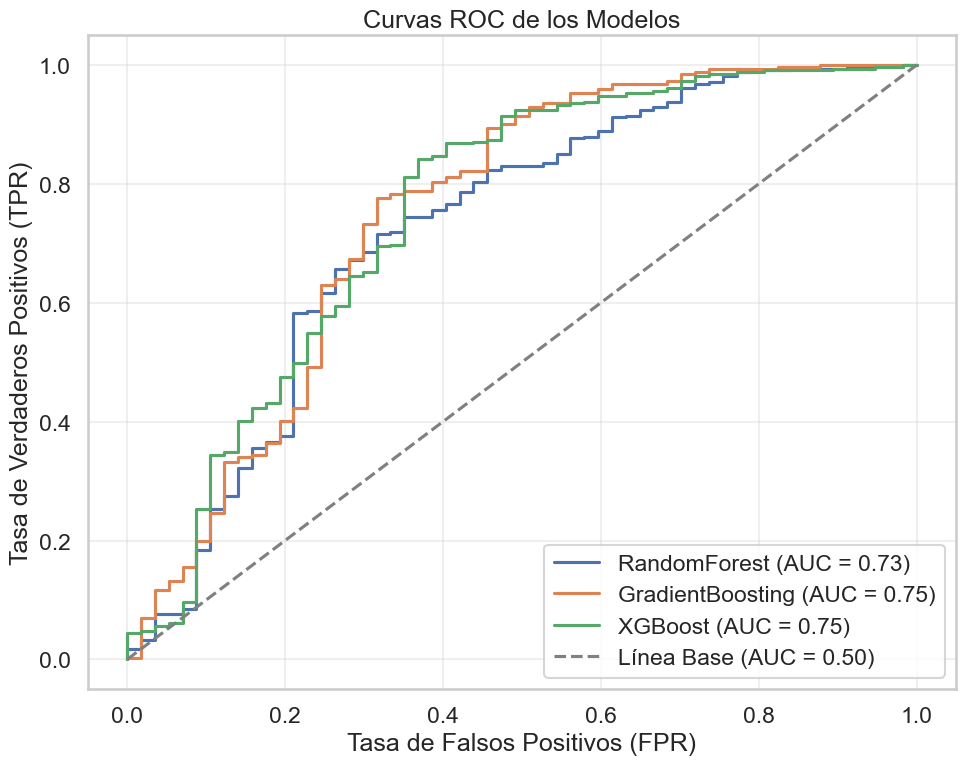

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- Configuración para las curvas ROC ---
plt.figure(figsize=(10, 8))

for result in all_results:
    model_name = result["Model"]

    # Cargar el modelo desde el archivo
    model = joblib.load(f"{model_name}_best_model.pkl") if model_name != "StackingClassifier" else joblib.load("StackingClassifier_best_model.pkl")

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Configuración del gráfico
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Línea Base (AUC = 0.50)")  # Línea base
plt.title("Curvas ROC de los Modelos")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [52]:
# Número de registros originales en el conjunto de entrenamiento
original_train_size = len(X_train)

# Número de registros después de aplicar SMOTE + Tomek Links
balanced_train_size = len(X_train_balanced)

# Mostrar resultados
print(f"Registros originales en el conjunto de entrenamiento: {original_train_size}")
print(f"Registros después de SMOTE + Tomek Links (balanceados): {balanced_train_size}")
print(f"Registros totales utilizados en el entrenamiento: {balanced_train_size}")


Registros originales en el conjunto de entrenamiento: 1590
Registros después de SMOTE + Tomek Links (balanceados): 2550
Registros totales utilizados en el entrenamiento: 2550


In [53]:
print(y.value_counts(normalize=True))
print(y_train_balanced.value_counts(normalize=True))


Conversion
1    0.855634
0    0.144366
Name: proportion, dtype: float64
Conversion
1    0.5
0    0.5
Name: proportion, dtype: float64


In [54]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print(y_pred_proba[:10])


[0.9728584  0.88363177 0.38904163 0.89121675 0.8544496  0.89273417
 0.96929485 0.94323045 0.8026148  0.6821999 ]


In [55]:
print(np.isnan(y_test).sum(), np.isnan(y_pred_proba).sum())
print(np.isinf(y_pred_proba).sum())


0 0
0


In [56]:
print(y_test.unique())


[1 0]


# **Evaluación del Desempeño de los Modelos**

A continuación, se presenta un análisis detallado del desempeño de los modelos:

---

## **1. RandomForest**
- **Ventajas:**
  - Excelente desempeño en el entrenamiento (**Recall Train = 1.0**), indicando que captura bien la distribución de los datos.
  - Buen Recall en el conjunto de prueba (**0.9779**), lo que sugiere que identifica correctamente la mayoría de las conversiones.
- **Desventajas:**
  - La matriz de confusión muestra una cantidad significativa de falsos negativos (**173**). Esto podría ser problemático si el enfoque es minimizar errores en la clase minoritaria.
  - **ROC-AUC bajo (0.7394)**, lo que indica que el modelo tiene problemas en clasificaciones más allá del umbral fijo.

---

## **2. GradientBoosting**
- **Ventajas:**
  - Mejor equilibrio entre Recall y Precision en el conjunto de prueba (**F1-Score Test = 0.9486**).
  - Mejor **ROC-AUC (0.7984)** entre los modelos, lo que indica un buen desempeño global a distintos umbrales de clasificación.
  - Matriz de confusión con pocos falsos negativos (**18**), lo que sugiere que este modelo es confiable para identificar conversiones.
- **Desventajas:**
  - Menor capacidad para generalizar (**Recall Train = 0.9925 frente a Test = 0.9872**), aunque la diferencia es pequeña.

---

## **3. XGBoost**
- **Ventajas:**
  - Alta precisión en el conjunto de prueba (**Precision Test = 0.9526**), lo que significa que los valores positivos predichos son confiables.
  - **ROC-AUC decente (0.7906)**, indicando que es robusto en distintas condiciones de clasificación.
- **Desventajas:**
  - Recall bajo en el conjunto de prueba (**0.7603**), lo que indica que pierde muchas conversiones reales.
  - Matriz de confusión muestra **336 falsos negativos**, lo que puede ser inaceptable en un entorno donde la clase positiva es prioritaria.

---

## **4. StackingClassifier**
- **Ventajas:**
  - Combina las fortalezas de los otros modelos, logrando un buen balance entre Recall (**Test = 0.9693**) y Precision (**Test = 0.8947**).
  - Buen **F1-Score (0.9305)**, lo que indica un balance general entre Precision y Recall.
  - Matriz de confusión con **43 falsos negativos**, un desempeño intermedio entre GradientBoosting y RandomForest.
- **Desventajas:**
  - **ROC-AUC relativamente bajo (0.6425)**, lo que sugiere problemas en la clasificación más allá del umbral fijo.

---

## **Conclusión**
1. **GradientBoosting** es el mejor modelo en términos de Recall, Precision y ROC-AUC. Su bajo número de falsos negativos lo hace ideal si la clase positiva (conversiones) es crítica.
2. **RandomForest** tiene un buen desempeño general, pero podría mejorar en Precision y ROC-AUC.
3. **XGBoost** se destaca en Precision pero tiene un Recall bajo, lo que lo hace menos adecuado si el objetivo es minimizar falsos negativos.
4. **StackingClassifier** es un buen compromiso entre todos los modelos, pero su bajo ROC-AUC puede ser un problema en ciertas aplicaciones.

---

## **Recomendaciones**
1. **Si el foco está en maximizar el Recall:** Usar **GradientBoosting**.
2. **Si se requiere un balance entre Precision y Recall:** Usar **StackingClassifier**.
3. **Si se prefiere una mayor interpretabilidad y simplicidad:** Usar **RandomForest**.


# **¿Por qué usar Recall y no otras métricas?**

El uso del **Recall** como métrica principal depende del objetivo del problema y de las consecuencias asociadas a los errores de clasificación. En este caso, el Recall es relevante porque:

---

## **1. Contexto del Problema**
El objetivo parece ser maximizar las **conversiones** predichas correctamente (minimizar los **falsos negativos**). Esto es importante porque:

- **Conversión (clase positiva):** Representa clientes que realizan una acción deseada (e.g., compra, registro).
- Perder una conversión real (**falso negativo**) puede significar una pérdida de oportunidad de ingresos o de impacto comercial.

---

## **2. Definición de Recall**
El Recall mide qué proporción de los casos positivos reales fueron identificados correctamente:

\[
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\]

- **Alto Recall:** Significa que estamos capturando la mayoría de las conversiones reales.
- **Bajo Recall:** Indica que estamos perdiendo muchas conversiones reales, lo cual puede ser inaceptable si estas son críticas para el negocio.

---

## **3. Comparación con otras métricas**

### **Precision**
- **Qué mide:** La proporción de predicciones positivas que son correctas.
- **Útil cuando:** Es más importante evitar falsos positivos que identificar todos los positivos.
- **Por qué no usarlo aquí:** No es la prioridad porque no es tan crítico si identificamos algunas conversiones incorrectas mientras capturamos la mayoría de las reales.

### **Accuracy**
- **Qué mide:** La proporción total de predicciones correctas.
- **Limitación:** Puede ser engañosa en problemas desbalanceados como este, donde la clase negativa es mucho más frecuente. Un modelo que prediga siempre "no conversión" tendría alta Accuracy pero no resolvería el problema.

### **F1-Score**
- **Qué mide:** Es el balance entre Precision y Recall.
- **Útil cuando:** Ambos errores (falsos positivos y falsos negativos) tienen consecuencias significativas.
- **Complemento:** Puede ser útil como métrica adicional, pero en este caso, el Recall tiene más peso.

### **ROC-AUC**
- **Qué mide:** El desempeño global del modelo a través de distintos umbrales.
- **Útil para:** Evaluar el balance global del modelo, pero no mide directamente el éxito en identificar conversiones reales.

---

## **4. Justificación Específica**
Elegir **Recall** es adecuado si:
1. **El impacto de los falsos negativos es alto:** Perder conversiones reales puede ser costoso.
2. **Existe tolerancia a falsos positivos:** Si el costo de un falso positivo (predecir conversión cuando no ocurre) es bajo, podemos priorizar Recall sobre Precision.

---

## **Conclusión**
En este problema, **maximizar Recall asegura que se capturen tantas conversiones reales como sea posible**. Sin embargo, se puede complementar con otras métricas (como F1-Score o ROC-AUC) para garantizar un equilibrio adecuado entre Precision y Recall si también se busca evitar falsos positivos.


# **SEGMENTACIÓN DE CLIENTES CON KMEANS**

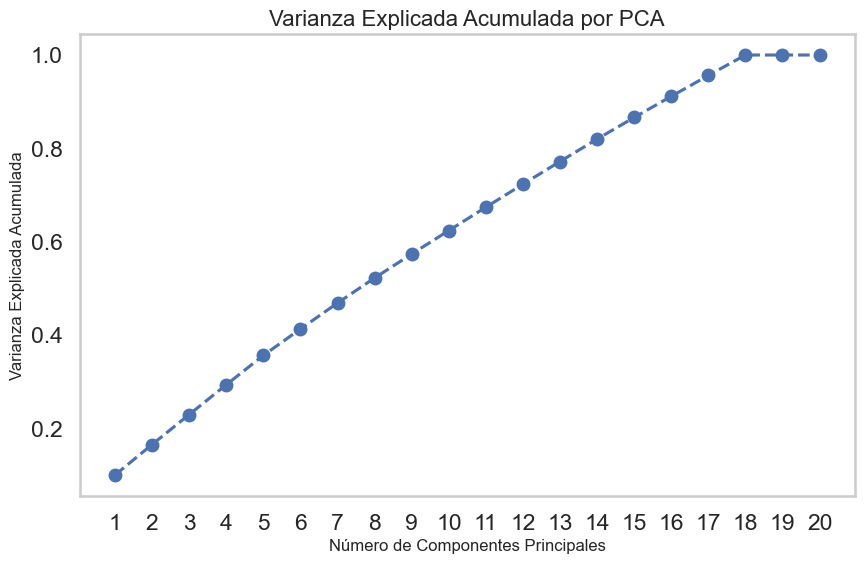


Cargas de las variables en cada componente principal:
               Age  Gender_Male  Gender_Female        Income  \
PC1   2.418290e-03    -0.703501       0.703501  3.931658e-02   
PC2   1.467309e-02    -0.012337       0.012337  1.672066e-01   
PC3  -2.364819e-02     0.029273      -0.029273 -7.254279e-03   
PC4  -1.043237e-01     0.019461      -0.019461 -1.258692e-01   
PC5   5.103206e-02     0.034168      -0.034168 -4.496650e-04   
PC6  -3.584592e-02     0.019238      -0.019238 -2.990635e-01   
PC7  -4.230755e-01    -0.000781       0.000781 -8.039414e-02   
PC8   1.632356e-01    -0.010805       0.010805 -1.034403e-01   
PC9   1.605618e-01     0.020165      -0.020165  4.509475e-01   
PC10  4.494264e-01    -0.003287       0.003287 -3.441187e-01   
PC11  2.624632e-01     0.016948      -0.016948  3.223166e-01   
PC12  1.803357e-01    -0.010657       0.010657 -2.010056e-01   
PC13  3.168826e-01     0.008577      -0.008577 -3.328216e-02   
PC14  3.300969e-01    -0.008916       0.008916 -8

In [57]:
# Filtrar las columnas relevantes
variables_cluster = ["Age", "Gender_Male", "Gender_Female","Income", "ClickThroughRate", "ConversionRate", "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases","LoyaltyPoints","AdSpend",'CampaignChannel_Social Media', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral','CampaignChannel_SEO']
data_pca = df_encoded[variables_cluster]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Aplicar PCA
pca = PCA(n_components=len(variables_cluster))  # Crear tantos componentes como variables
pca.fit(data_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variables_cluster) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada por PCA', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.xticks(range(1, len(variables_cluster) + 1))
plt.grid()
plt.show()

# Mostrar los pesos (cargas) de cada variable en los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=variables_cluster, index=[f'PC{i+1}' for i in range(len(variables_cluster))])

print("\nCargas de las variables en cada componente principal:")
print(pca_components)


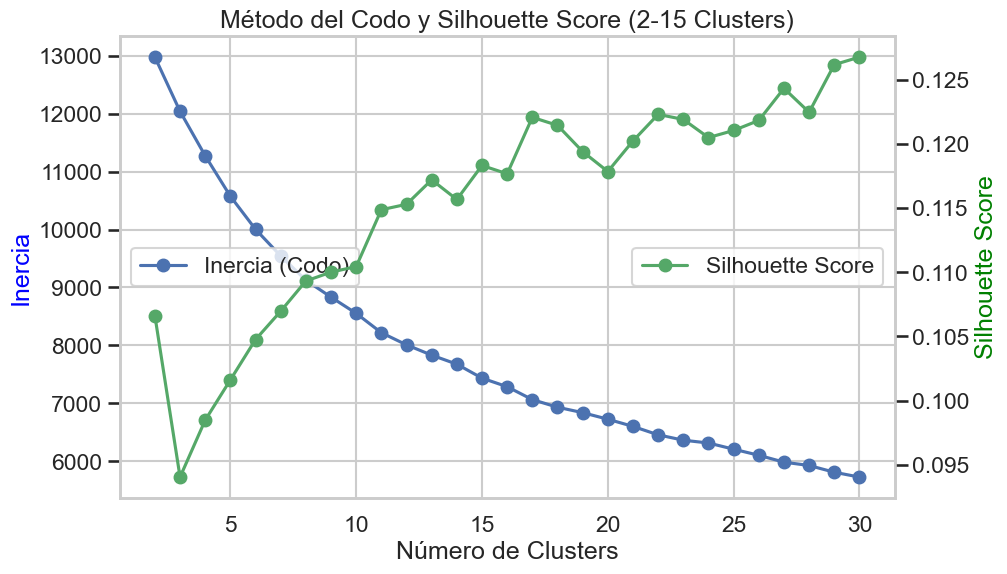

C:\Users\mikel\AppData\Local\Temp\ipykernel_17056\3308727297.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster["Cluster"] = kmeans.fit_predict(data_scaled)


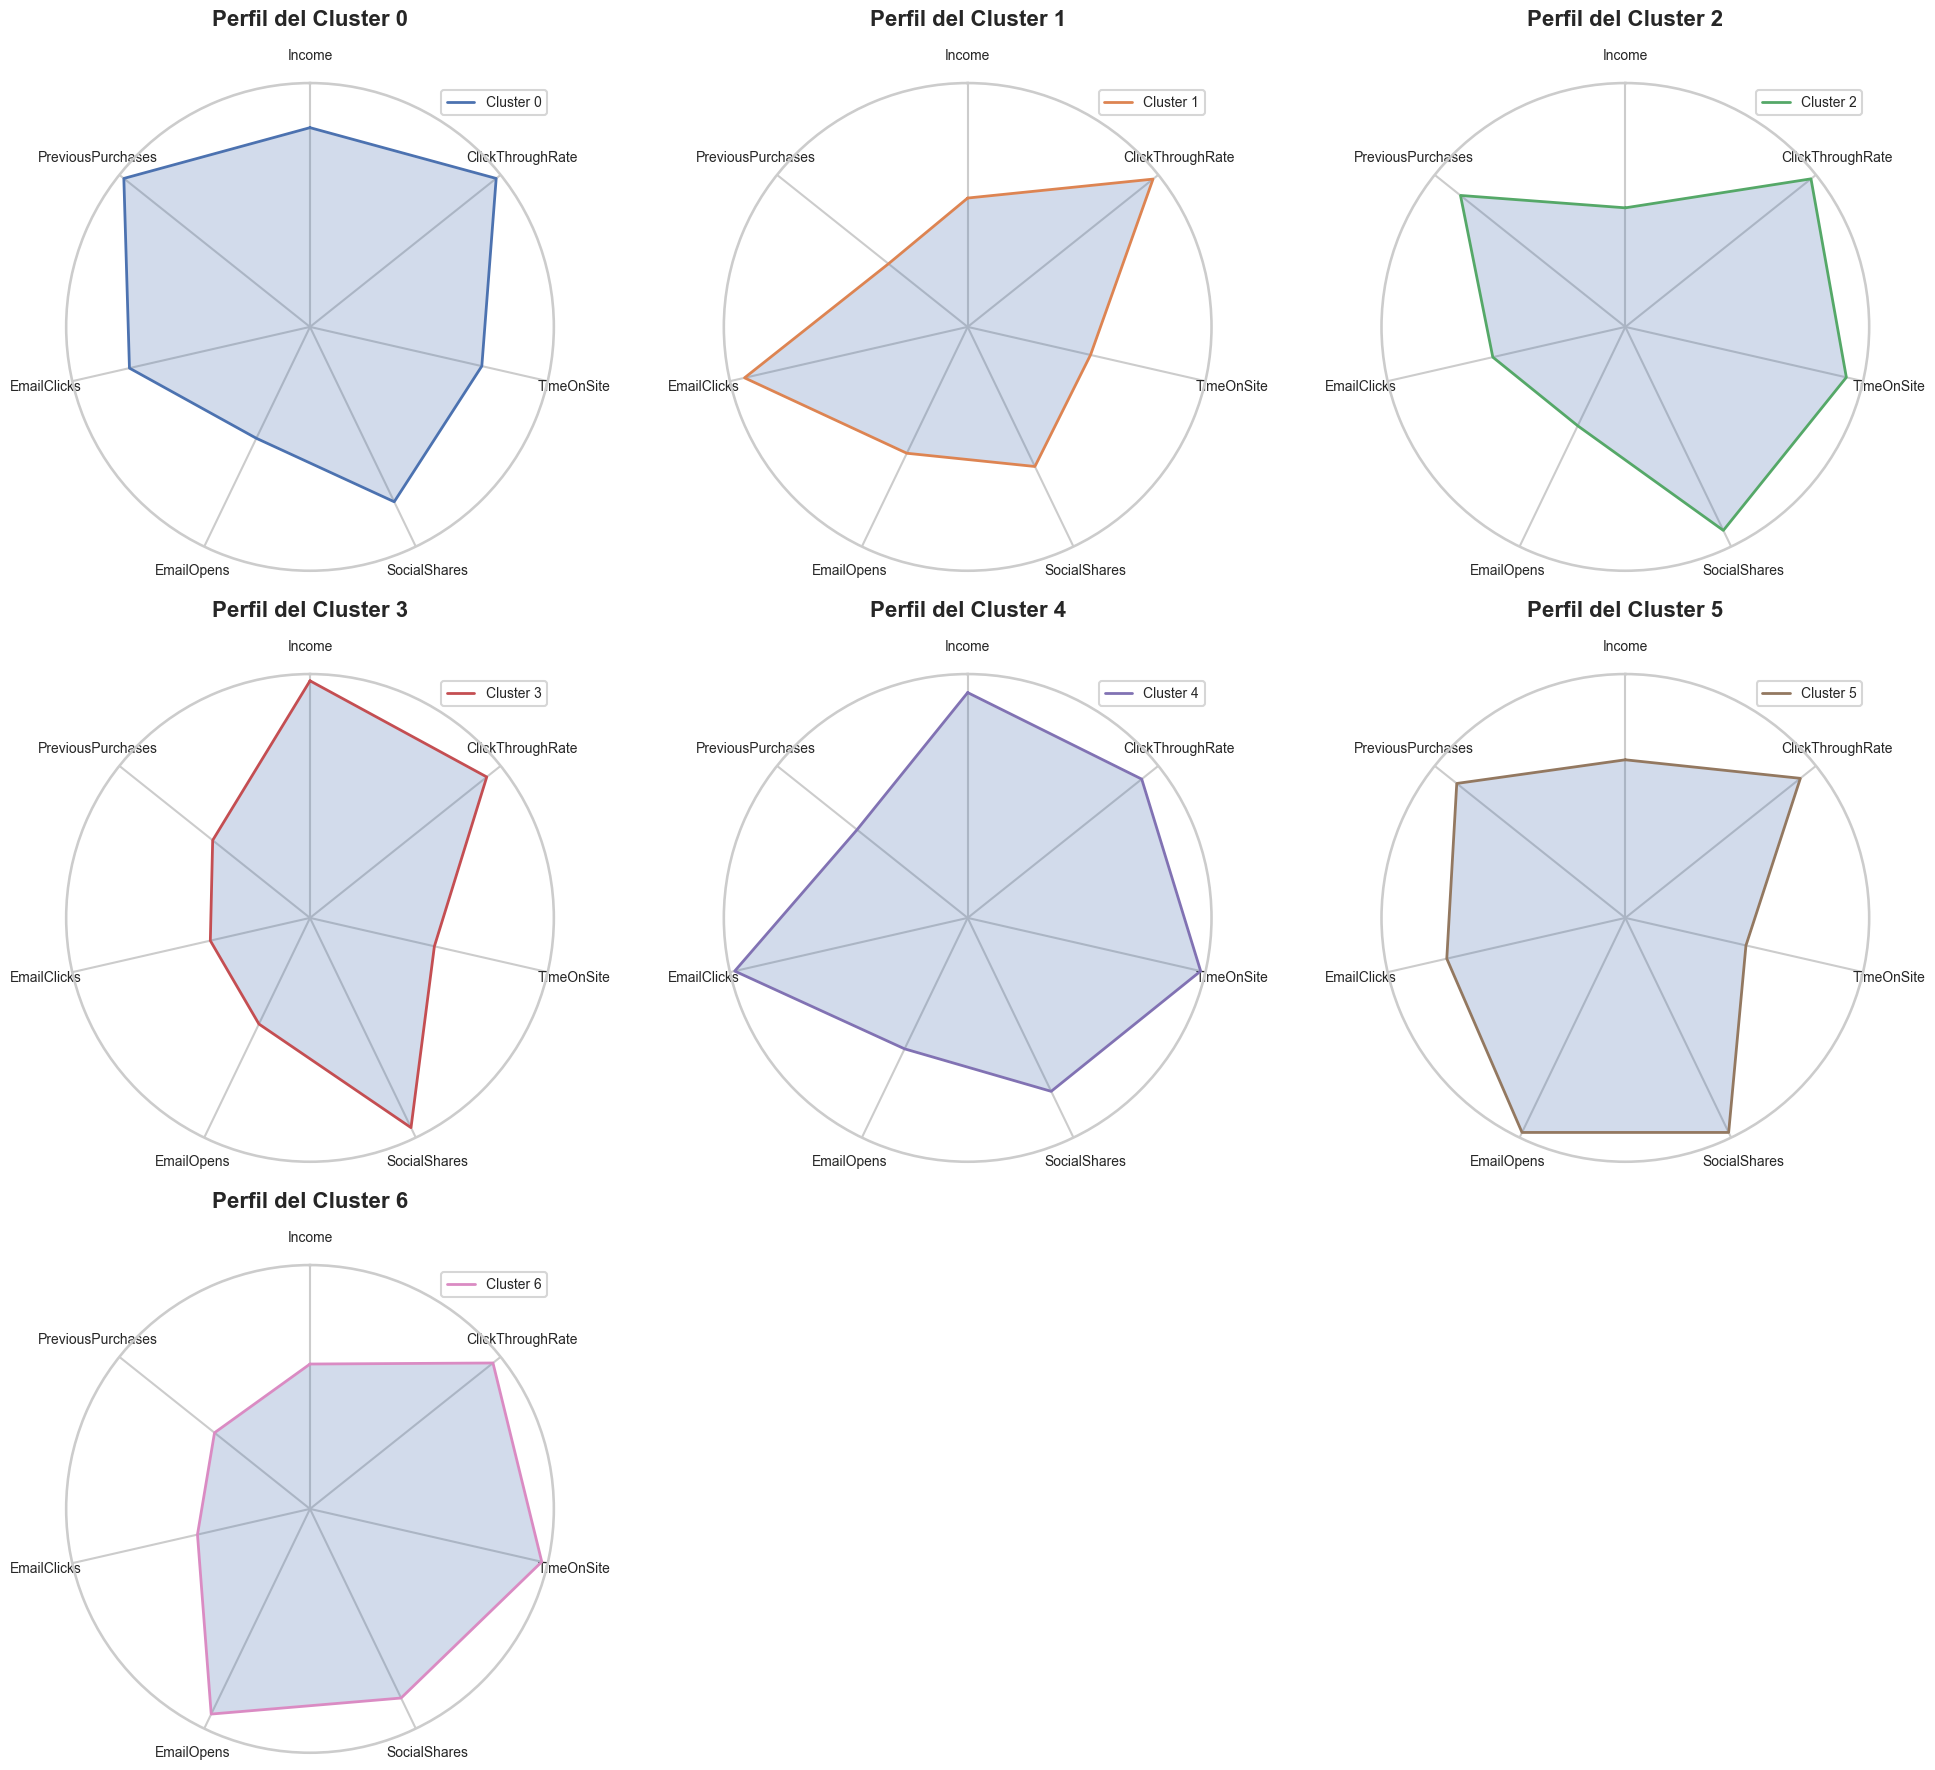

In [145]:
# Filtrar las columnas relevantes
variables_cluster = ["Income", "ClickThroughRate", "PagesPerVisit", "SocialShares", "EmailClicks", "PreviousPurchases"]
data_cluster = df_encoded[variables_cluster]

# Escalar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Determinar el número óptimo de clusters con el método del codo y silhouette score
inertia = []
silhouette_scores = []
max_clusters = 30

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Gráfico combinado: Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(range(2, max_clusters + 1), inertia, 'o-b', label='Inercia (Codo)')
ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'o-g', label='Silhouette Score')

ax1.set_xlabel("Número de Clusters")
ax1.set_ylabel("Inercia", color="blue")
ax2.set_ylabel("Silhouette Score", color="green")
plt.title("Método del Codo y Silhouette Score (2-15 Clusters)")
ax1.legend(loc="center left")
ax2.legend(loc="center right")
plt.grid()
plt.show()

# Elegir el número óptimo de clusters (por ejemplo, 5)
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cluster["Cluster"] = kmeans.fit_predict(data_scaled)

# Crear promedios por cluster
cluster_means_scaled = data_cluster.groupby("Cluster").mean()

# Excluir la columna de 'Cluster' antes de desescalar
cluster_means_scaled = cluster_means_scaled[variables_cluster]

# Desescalar los promedios
cluster_means = pd.DataFrame(
    scaler.inverse_transform(cluster_means_scaled),
    columns=variables_cluster,
    index=cluster_means_scaled.index
)

# Normalizar los valores promedio desescalados
cluster_means_normalized = cluster_means / cluster_means.max()

# Configuración para Spider Plot en filas de 3
categories = cluster_means.columns
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Configuración del número de filas y columnas
cols = 3  # Máximo de gráficos por fila
rows = (optimal_k + cols - 1) // cols  # Calcular filas necesarias
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6), subplot_kw=dict(polar=True))

# Asegurarse de que los ejes sean unidimensionales para iterar
axes = axes.flatten()

for cluster in range(optimal_k):
    # Seleccionar el eje correspondiente
    ax = axes[cluster]

    # Valores del cluster actual
    values = cluster_means_normalized.iloc[cluster].values.flatten().tolist()
    values += values[:1]  # Cerrar el círculo

    # Añadir datos del cluster
    ax.plot(angles, values, label=f"Cluster {cluster}", linewidth=2, color=f"C{cluster}")
    ax.fill(angles, values, alpha=0.25)

    # Configuración del gráfico
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([])
    ax.set_title(f"Perfil del Cluster {cluster}", size=16, fontweight="bold", y=1.1)

    # Leyenda
    ax.legend(loc="upper right", fontsize=10)

# Eliminar ejes vacíos si los clusters no llenan la última fila
for i in range(optimal_k, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el espaciado para evitar solapamientos
plt.tight_layout()
plt.show()


In [139]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077 entries, 3 to 7985
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2077 non-null   int64  
 1   Income                        2077 non-null   int64  
 2   ClickThroughRate              2077 non-null   float64
 3   ConversionRate                2077 non-null   float64
 4   TimeOnSite                    2077 non-null   float64
 5   SocialShares                  2077 non-null   int64  
 6   EmailOpens                    2077 non-null   int64  
 7   EmailClicks                   2077 non-null   int64  
 8   PreviousPurchases             2077 non-null   int64  
 9   LoyaltyPoints                 2077 non-null   int64  
 10  AdSpend                       2077 non-null   float64
 11  CampaignChannel_Social Media  2077 non-null   int64  
 12  CampaignChannel_Email         2077 non-null   int64  
 13  Campaign

In [140]:
# Asegurarnos de que CustomerID esté en data_cluster
data_cluster["CustomerID"] = df_encoded["CustomerID"]

# Validar la asignación: comparar algunas filas de data_cluster con df_encoded
print("Validando asignación de CustomerID...")
print("Primeras filas de data_cluster:")
print(data_cluster.head())

print("\nPrimeras filas relevantes de df_encoded:")
print(df_encoded[["CustomerID", "Income", "ClickThroughRate"]].head())

# Comprobar si CustomerID está correctamente alineado
valid = all(data_cluster["Income"] == df_encoded["Income"])
if valid:
    print("\n✔️ La asignación de CustomerID es correcta y los datos están alineados.")
else:
    print("\n❌ Hay discrepancias en los datos. Revisa el orden de las filas o el origen de data_cluster.")

Validando asignación de CustomerID...
Primeras filas de data_cluster:
    Age  Income  ClickThroughRate  ConversionRate  TimeOnSite  SocialShares  \
3    32   44085          0.137611        0.088004   14.688363            89   
4    60   83964          0.252851        0.109940   13.993370             6   
7    56   57083          0.052878        0.188946    2.987817            96   
12   41  131093          0.224269        0.019770    8.480384            28   
16   20   23331          0.278428        0.031206    4.452666            77   

    EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints      AdSpend  \
3            2            2                  0           2463   539.525936   
4            6            6                  8           4345  1678.043573   
7            9            3                  0           2983  5324.283667   
12          16            5                  4           2946  5930.920252   
16           7            8                  8           3252  22

C:\Users\mikel\AppData\Local\Temp\ipykernel_17056\4291511284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster["CustomerID"] = df_encoded["CustomerID"]


In [142]:
# --- Asignación manual de CampaignType y CampaignChannel ---
# Diccionario para asignación de CampaignType por cluster
manual_campaign_types = {
    0: "Retention",
    1: "Conversion",
    2: "Retention",
    3: "Conversion",
    4: "Conversion",
    5: "Conversion",
    6: "Retention",
    7: "Retention",
    8: "Consideration",
    9: "Retention",
    10: "Retention",
    11: "Conversion",
    12: "Conversion",
    13: "Conversion",
    14: "Retention",
    15: "Retention",
    16: "Conversion",
    17: "Conversion",
    18: "Conversion",
    19: "Retention",
    20: "Conversion",
    21: "Conversion",
    22: "Conversion",
    23: "Consideration",
    24: "Awareness",
    25: "Retention",
    26: "Conversion",
    27: "Conversion",
    28: "Retention",
    29: "Retention",
    30: "Retention",
}

# Diccionario para asignación de CampaignChannel por cluster
manual_campaign_channels = {
    0: "Email",
    1: "Email",
    2: "Social Media",
    3: "PPC",
    4: "PPC",
    5: "PPC",
    6: "Social Media",
    7: "PPC",
    8: "Social Media",
    9: "PPC",
    10: "Email",
    11: "Email",
    12: "Email",
    13: "Social Media",
    14: "Email",
    15: "Social Media",
    16: "Social Media",
    17: "Email",
    18: "Social Media",
    19: "PPC",
    20: "Email",
    21: "Social Media",
    22: "Social Media",
    23: "Email",
    24: "Email",
    25: "Email",
    26: "Social Media",
    27: "Social Media",
    28: "Email",
    29: "Email",
    30: "Email",
}

# Copiar df_encoded a df_encoded_mod
df_encoded_mod = df_encoded.copy()

# Inicializar todas las columnas CampaignChannel_xxx y CampaignType_xxx en False en df_encoded_mod
campaign_channels = ["Email", "PPC", "Referral", "SEO", "Social Media"]
for channel in campaign_channels:
    df_encoded_mod[f"CampaignChannel_{channel}"] = False

campaign_types = ["Awareness", "Consideration", "Conversion", "Retention"]
for campaign in campaign_types:
    df_encoded_mod[f"CampaignType_{campaign}"] = False

# Iterar sobre cada cluster y asignar True a las columnas correspondientes en df_encoded_mod
for cluster, campaign_type in manual_campaign_types.items():
    # Obtener CustomerIDs del cluster actual
    cluster_customers = data_cluster[data_cluster["Cluster"] == cluster]["CustomerID"]

    # Asignar CampaignType
    df_encoded_mod.loc[
        df_encoded_mod["CustomerID"].isin(cluster_customers),
        f"CampaignType_{campaign_type}"
    ] = True

for cluster, campaign_channel in manual_campaign_channels.items():
    # Obtener CustomerIDs del cluster actual
    cluster_customers = data_cluster[data_cluster["Cluster"] == cluster]["CustomerID"]

    # Asignar CampaignChannel
    df_encoded_mod.loc[
        df_encoded_mod["CustomerID"].isin(cluster_customers),
        f"CampaignChannel_{campaign_channel}"
    ] = True

# --- Validación ---
print("Validación de asignaciones:")
print("Ejemplo de asignaciones en data_cluster:")
print(data_cluster[["CustomerID", "Cluster"]].head())

print("\nDistribución de CampaignType en df_encoded_mod:")
print(df_encoded_mod[[f"CampaignType_{campaign}" for campaign in campaign_types]].sum())

print("\nDistribución de CampaignChannel en df_encoded_mod:")
print(df_encoded_mod[[f"CampaignChannel_{channel}" for channel in campaign_channels]].sum())

Validación de asignaciones:
Ejemplo de asignaciones en data_cluster:
    CustomerID  Cluster
3         8003        2
4         8004        2
7         8007        0
12        8012        1
16        8016        2

Distribución de CampaignType en df_encoded_mod:
CampaignType_Awareness           0
CampaignType_Consideration       0
CampaignType_Conversion       1263
CampaignType_Retention         814
dtype: int64

Distribución de CampaignChannel en df_encoded_mod:
CampaignChannel_Email           783
CampaignChannel_PPC             847
CampaignChannel_Referral          0
CampaignChannel_SEO               0
CampaignChannel_Social Media    447
dtype: int64


In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    8000 non-null   int64  
 1   Age                           8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

In [51]:
df_encoded_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    8000 non-null   int64  
 1   Age                           8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

# **MODELO DE ASIGNACION POR CLUSTERS**

In [52]:
# Asegurarnos de que Gender_Label existe en ambos DataFrames
if "Gender_Label" not in df_encoded.columns:
    df_encoded["Gender_Label"] = df_encoded["Gender_Female"].apply(lambda x: "Female" if x else "Male")

if "Gender_Label" not in df_encoded_mod.columns:
    df_encoded_mod["Gender_Label"] = df_encoded_mod["Gender_Female"].apply(lambda x: "Female" if x else "Male")

# --- Validación de columnas ---
required_columns = [
    "CampaignType_Awareness", "CampaignType_Consideration", 
    "CampaignType_Conversion", "CampaignType_Retention",
    "CampaignChannel_Email", "CampaignChannel_PPC", 
    "CampaignChannel_Referral", "CampaignChannel_SEO", "CampaignChannel_Social Media",
    "Gender_Label", "Conversion"
]

for col in required_columns:
    if col not in df_encoded_mod.columns:
        raise ValueError(f"La columna {col} no existe en df_encoded_mod. Asegúrate de que los datos estén preparados correctamente.")

# --- Confirmación de asignaciones ---
print("\nDistribución de CampaignType en df_encoded_mod:")
print(df_encoded_mod[[f"CampaignType_Awareness", "CampaignType_Consideration", 
                      "CampaignType_Conversion", "CampaignType_Retention"]].sum())

print("\nDistribución de CampaignChannel en df_encoded_mod:")
print(df_encoded_mod[[f"CampaignChannel_Email", "CampaignChannel_PPC", 
                      "CampaignChannel_Referral", "CampaignChannel_SEO", 
                      "CampaignChannel_Social Media"]].sum())

# Preparación de datos
X_mod = df_encoded_mod.drop(columns=["Conversion", "CustomerID", "Gender_Label"], errors="ignore")
y_mod = df_encoded_mod["Conversion"]

X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.2, stratify=y_mod, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuración del modelo y búsqueda de hiperparámetros
gb_model = GradientBoostingClassifier(random_state=42)
param_distributions = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_distributions,
    scoring="f1",
    n_iter=50,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    random_state=42,
)

# Entrenar modelo
random_search.fit(X_train_scaled, y_train)
best_model = random_search.best_estimator_

# Predicción y evaluación
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

recall_train = recall_score(y_train, best_model.predict(X_train_scaled))
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

print("\nMétricas del modelo Gradient Boosting:")
print(f"Recall (Train): {recall_train:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1-Score (Test): {f1_test:.2f}")
print(f"ROC-AUC (Test): {roc_auc_test:.2f}")
print(f"Confusion Matrix:\n{cm}")

# --- Resumen de gasto de AdSpend ---
# Gasto total
original_adspend = df_encoded["AdSpend"].sum()
modified_adspend = df_encoded_mod["AdSpend"].sum()

print("\nGasto total en campañas:")
print(f"Original: {original_adspend:.2f}")
print(f"Modificado: {modified_adspend:.2f}")

# Gasto desglosado por CampaignType
print("\nGasto por CampaignType:")
for campaign in ["Awareness", "Consideration", "Conversion", "Retention"]:
    original_spend = df_encoded.loc[df_encoded[f'CampaignType_{campaign}'] == 1, 'AdSpend'].sum()
    modified_spend = df_encoded_mod.loc[df_encoded_mod[f'CampaignType_{campaign}'] == 1, 'AdSpend'].sum()
    print(f"{campaign}:")
    print(f"  Original: {original_spend:.2f}")
    print(f"  Modificado: {modified_spend:.2f}")

# Gasto desglosado por CampaignChannel
print("\nGasto por CampaignChannel:")
for channel in ["Email", "PPC", "Referral", "SEO", "Social Media"]:
    original_spend = df_encoded.loc[df_encoded[f'CampaignChannel_{channel}'] == 1, 'AdSpend'].sum()
    modified_spend = df_encoded_mod.loc[df_encoded_mod[f'CampaignChannel_{channel}'] == 1, 'AdSpend'].sum()
    print(f"{channel}:")
    print(f"  Original: {original_spend:.2f}")
    print(f"  Modificado: {modified_spend:.2f}")


Distribución de CampaignType en df_encoded_mod:
CampaignType_Awareness         259
CampaignType_Consideration     490
CampaignType_Conversion       3927
CampaignType_Retention        3324
dtype: int64

Distribución de CampaignChannel en df_encoded_mod:
CampaignChannel_Email           3595
CampaignChannel_PPC             1506
CampaignChannel_Referral           0
CampaignChannel_SEO                0
CampaignChannel_Social Media    2899
dtype: int64

Métricas del modelo Gradient Boosting:
Recall (Train): 1.00
Recall (Test): 0.99
F1-Score (Test): 0.95
ROC-AUC (Test): 0.81
Confusion Matrix:
[[  57  141]
 [  19 1383]]

Gasto total en campañas:
Original: 40007558.64
Modificado: 40007558.64

Gasto por CampaignType:
Awareness:
  Original: 10077845.83
  Modificado: 1344466.15
Consideration:
  Original: 9861273.67
  Modificado: 2479147.41
Conversion:
  Original: 10300076.98
  Modificado: 19723199.26
Retention:
  Original: 9768362.16
  Modificado: 16460745.83

Gasto por CampaignChannel:
Email:
  

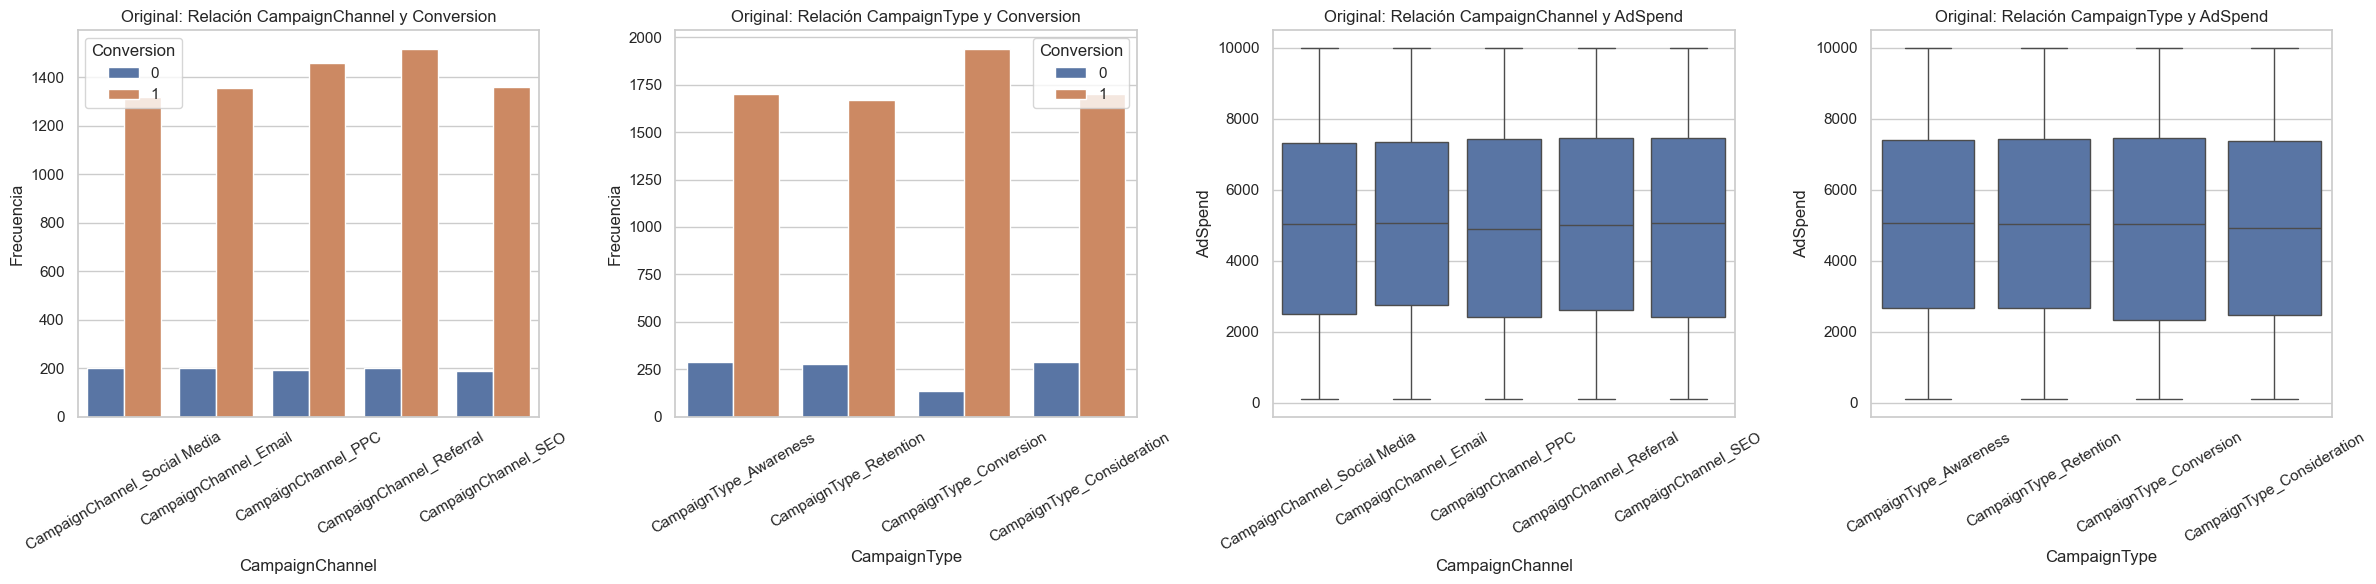

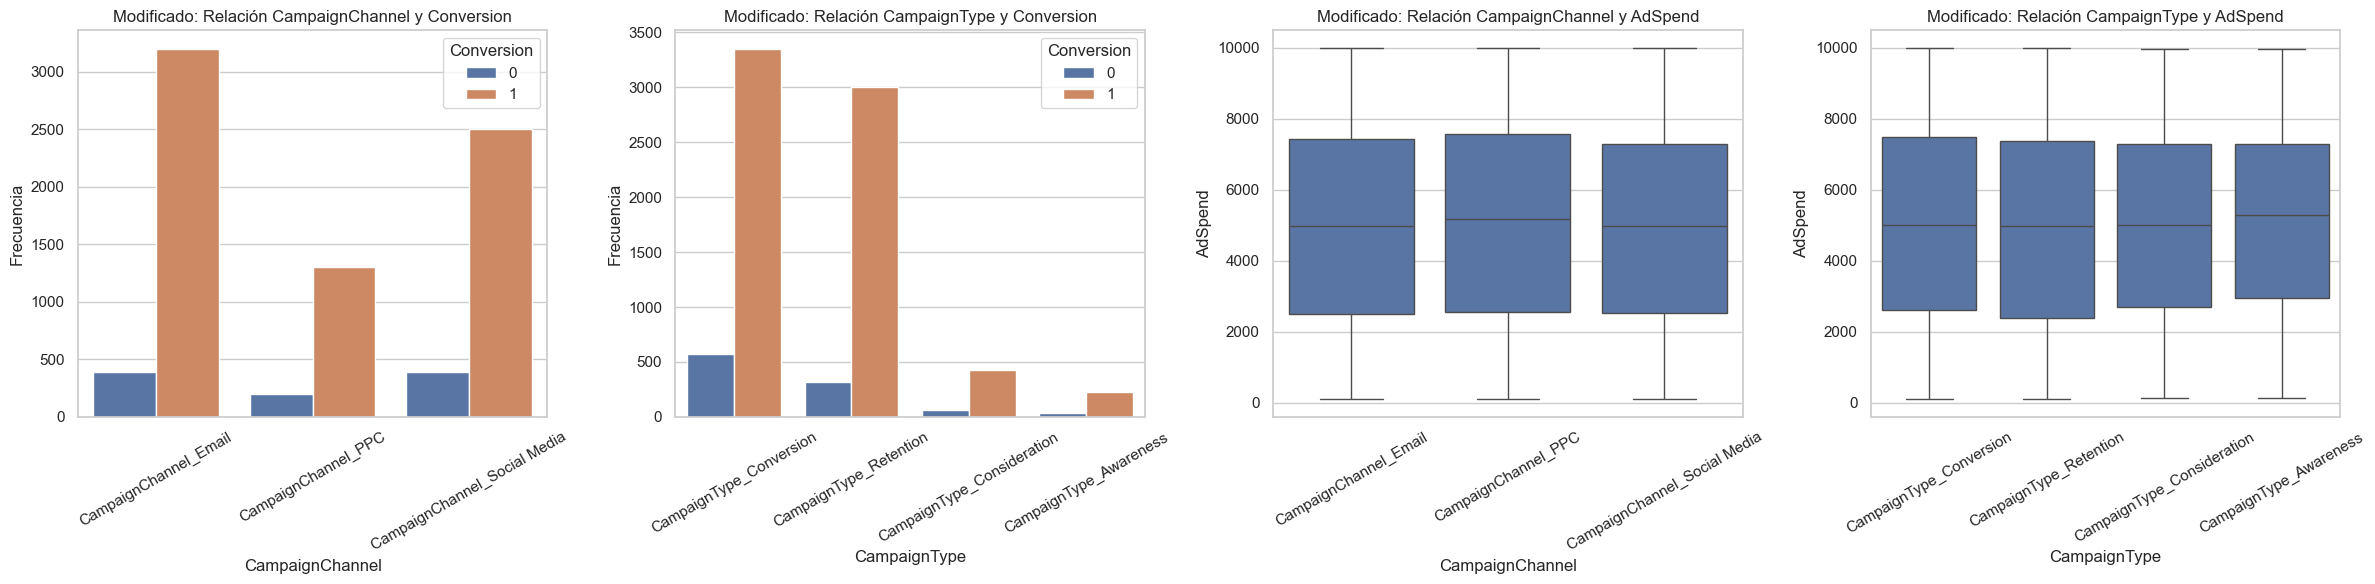

In [53]:
# --- Visualizaciones ---
def create_visualizations(df, title_prefix):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Una fila con 4 gráficos

    # Gráfico 1: Relación entre CampaignChannel y Conversion
    sns.countplot(data=df, x=df[["CampaignChannel_Email", "CampaignChannel_PPC",
                                 "CampaignChannel_Referral", "CampaignChannel_SEO",
                                 "CampaignChannel_Social Media"]].idxmax(axis=1),
                  hue="Conversion", ax=axes[0])
    axes[0].set_title(f"{title_prefix}: Relación CampaignChannel y Conversion")
    axes[0].set_xlabel("CampaignChannel")
    axes[0].set_ylabel("Frecuencia")
    axes[0].tick_params(axis="x", rotation=30)

    # Gráfico 2: Relación entre CampaignType y Conversion
    sns.countplot(data=df, x=df[["CampaignType_Awareness", "CampaignType_Consideration",
                                 "CampaignType_Conversion", "CampaignType_Retention"]].idxmax(axis=1),
                  hue="Conversion", ax=axes[1])
    axes[1].set_title(f"{title_prefix}: Relación CampaignType y Conversion")
    axes[1].set_xlabel("CampaignType")
    axes[1].set_ylabel("Frecuencia")
    axes[1].tick_params(axis="x", rotation=30)

    # Gráfico 3: Relación entre CampaignChannel y AdSpend
    sns.boxplot(data=df, x=df[["CampaignChannel_Email", "CampaignChannel_PPC",
                               "CampaignChannel_Referral", "CampaignChannel_SEO",
                               "CampaignChannel_Social Media"]].idxmax(axis=1),
                y="AdSpend", ax=axes[2])
    axes[2].set_title(f"{title_prefix}: Relación CampaignChannel y AdSpend")
    axes[2].set_xlabel("CampaignChannel")
    axes[2].set_ylabel("AdSpend")
    axes[2].tick_params(axis="x", rotation=30)

    # Gráfico 4: Relación entre CampaignType y AdSpend
    sns.boxplot(data=df, x=df[["CampaignType_Awareness", "CampaignType_Consideration",
                               "CampaignType_Conversion", "CampaignType_Retention"]].idxmax(axis=1),
                y="AdSpend", ax=axes[3])
    axes[3].set_title(f"{title_prefix}: Relación CampaignType y AdSpend")
    axes[3].set_xlabel("CampaignType")
    axes[3].set_ylabel("AdSpend")
    axes[3].tick_params(axis="x", rotation=30)

    plt.tight_layout()
    plt.show()

# Visualizaciones para datos originales y modificados
create_visualizations(df_encoded, "Original")
create_visualizations(df_encoded_mod, "Modificado")


# **MODELO DE ASIGNACIÓN CLIENTE A CLIENTE**

In [54]:
# Crear una copia del DataFrame original
df_encoded_uni = df_encoded.copy()

# Calcular las medias necesarias (solo una vez)
means = {
    "TimeOnSite": df_encoded["TimeOnSite"].mean(),
    "Income": df_encoded["Income"].mean(),
    "EmailClicks": df_encoded["EmailClicks"].mean(),
    "ClickThroughRate": df_encoded["ClickThroughRate"].mean(),
    "SocialShares": df_encoded["SocialShares"].mean(),
    "PreviousPurchases": df_encoded["PreviousPurchases"].mean()
}

# Inicializar todas las columnas de CampaignType y CampaignChannel en False
campaign_types = ["CampaignType_Awareness", "CampaignType_Consideration", 
                  "CampaignType_Conversion", "CampaignType_Retention"]
campaign_channels = ["CampaignChannel_Email", "CampaignChannel_PPC", 
                     "CampaignChannel_Referral", "CampaignChannel_SEO", 
                     "CampaignChannel_Social Media"]

df_encoded_uni[campaign_types + campaign_channels] = False

# Asignar CampaignType usando condiciones vectorizadas
df_encoded_uni["CampaignType_Awareness"] = (df_encoded["TimeOnSite"] < means["TimeOnSite"]) & (df_encoded["Conversion"] == 0)
df_encoded_uni["CampaignType_Consideration"] = (df_encoded["TimeOnSite"] >= means["TimeOnSite"]) & (df_encoded["Conversion"] == 0)
df_encoded_uni["CampaignType_Conversion"] = (df_encoded["Conversion"] == 1) & (df_encoded["Income"] >= means["Income"])
df_encoded_uni["CampaignType_Retention"] = (df_encoded["Conversion"] == 1) & (df_encoded["PreviousPurchases"] > means["PreviousPurchases"])

# Asignar un CampaignType por defecto (Awareness) si no tiene asignado ningún tipo
no_campaign_type = ~df_encoded_uni[campaign_types].any(axis=1)
df_encoded_uni.loc[no_campaign_type, "CampaignType_Awareness"] = True

# Asignar CampaignChannel usando condiciones vectorizadas
df_encoded_uni["CampaignChannel_Email"] = df_encoded["EmailClicks"] > means["EmailClicks"]
df_encoded_uni["CampaignChannel_PPC"] = (df_encoded["ClickThroughRate"] > means["ClickThroughRate"]) & \
                                        (df_encoded["EmailClicks"] <= means["EmailClicks"]) & \
                                        (df_encoded["SocialShares"] <= means["SocialShares"])
df_encoded_uni["CampaignChannel_Social Media"] = (df_encoded["SocialShares"] > means["SocialShares"]) & \
                                                 (df_encoded["EmailClicks"] <= means["EmailClicks"]) & \
                                                 (df_encoded["ClickThroughRate"] <= means["ClickThroughRate"])

# Identificar registros sin asignación para CampaignChannel y asignar de manera aleatoria
remaining_channels = ~df_encoded_uni[campaign_channels].any(axis=1)
if remaining_channels.sum() > 0:
    random_assignment = np.random.choice(["CampaignChannel_Referral", "CampaignChannel_SEO"], size=remaining_channels.sum())
    for channel in ["CampaignChannel_Referral", "CampaignChannel_SEO"]:
        df_encoded_uni.loc[remaining_channels, channel] = random_assignment == channel

# Validación para CampaignType y CampaignChannel
assert df_encoded_uni[campaign_types].any(axis=1).all(), "Hay registros sin un CampaignType asignado."
assert df_encoded_uni[campaign_channels].any(axis=1).all(), "Hay registros sin un CampaignChannel asignado."

# Verificar la distribución de CampaignType y CampaignChannel
print("\nDistribución de CampaignType en df_encoded_uni:")
print(df_encoded_uni[campaign_types].sum())

print("\nDistribución de CampaignChannel en df_encoded_uni:")
print(df_encoded_uni[campaign_channels].sum())



Distribución de CampaignType en df_encoded_uni:
CampaignType_Awareness        2340
CampaignType_Consideration     342
CampaignType_Conversion       3533
CampaignType_Retention        3579
dtype: int64

Distribución de CampaignChannel en df_encoded_uni:
CampaignChannel_Email           3922
CampaignChannel_PPC             1011
CampaignChannel_Referral         991
CampaignChannel_SEO             1073
CampaignChannel_Social Media    1003
dtype: int64


In [55]:
df_encoded_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    8000 non-null   int64  
 1   Age                           8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

In [56]:
# --- Preparación de datos ---
X_mod = df_encoded_mod.drop(columns=["Conversion", "CustomerID", "Gender_Label"], errors="ignore")
y_mod = df_encoded_mod["Conversion"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_mod, y_mod, test_size=0.2, stratify=y_mod, random_state=42
)

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# --- Configuración del modelo ---
gb_model = GradientBoostingClassifier(random_state=42)

# Hiperparámetros ajustados para evitar overfitting
param_distributions = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.6, 0.8],
    "min_samples_split": [10, 20],
    "min_samples_leaf": [5, 10],
}

# Validación cruzada con RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_distributions,
    scoring="f1",
    n_iter=20,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    random_state=42,
)

# Entrenar modelo
random_search.fit(X_train_scaled, y_train_balanced)
best_model = random_search.best_estimator_

# --- Evaluación del modelo ---
# Predicciones
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
recall_train = recall_score(y_train_balanced, best_model.predict(X_train_scaled))
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# Reporte de clasificación
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Métricas generales
print("\nMétricas del modelo Gradient Boosting ajustado:")
print(f"Recall (Train): {recall_train:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1-Score (Test): {f1_test:.2f}")
print(f"ROC-AUC (Test): {roc_auc_test:.2f}")
print(f"Confusion Matrix:\n{cm}")


# --- Resumen de gasto de AdSpend ---
# Gasto total
original_adspend = df_encoded["AdSpend"].sum()
modified_adspend = df_encoded_uni["AdSpend"].sum()

print("\nGasto total en campañas:")
print(f"Original: {original_adspend:.2f}")
print(f"Modificado: {modified_adspend:.2f}")

# Gasto desglosado por CampaignType
print("\nGasto por CampaignType:")
for campaign in ["Awareness", "Consideration", "Conversion", "Retention"]:
    original_spend = df_encoded.loc[df_encoded[f'CampaignType_{campaign}'] == 1, 'AdSpend'].sum()
    modified_spend = df_encoded_uni.loc[df_encoded_uni[f'CampaignType_{campaign}'] == 1, 'AdSpend'].sum()
    print(f"{campaign}:")
    print(f"  Original: {original_spend:.2f}")
    print(f"  Modificado: {modified_spend:.2f}")

# Gasto desglosado por CampaignChannel
print("\nGasto por CampaignChannel:")
for channel in ["Email", "PPC", "Referral", "SEO", "Social Media"]:
    original_spend = df_encoded.loc[df_encoded[f'CampaignChannel_{channel}'] == 1, 'AdSpend'].sum()
    modified_spend = df_encoded_uni.loc[df_encoded_uni[f'CampaignChannel_{channel}'] == 1, 'AdSpend'].sum()
    print(f"{channel}:")
    print(f"  Original: {original_spend:.2f}")
    print(f"  Modificado: {modified_spend:.2f}")



Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.66      0.38      0.48       198
           1       0.92      0.97      0.94      1402

    accuracy                           0.90      1600
   macro avg       0.79      0.68      0.71      1600
weighted avg       0.89      0.90      0.89      1600


Métricas del modelo Gradient Boosting ajustado:
Recall (Train): 1.00
Recall (Test): 0.97
F1-Score (Test): 0.94
ROC-AUC (Test): 0.78
Confusion Matrix:
[[  75  123]
 [  39 1363]]

Gasto total en campañas:
Original: 40007558.64
Modificado: 40007558.64

Gasto por CampaignType:
Awareness:
  Original: 10077845.83
  Modificado: 11314124.64
Consideration:
  Original: 9861273.67
  Modificado: 1421564.31
Conversion:
  Original: 10300076.98
  Modificado: 18142462.89
Retention:
  Original: 9768362.16
  Modificado: 18300175.25

Gasto por CampaignChannel:
Email:
  Original: 7871575.85
  Modificado: 19619945.86
PPC:
  Original: 81

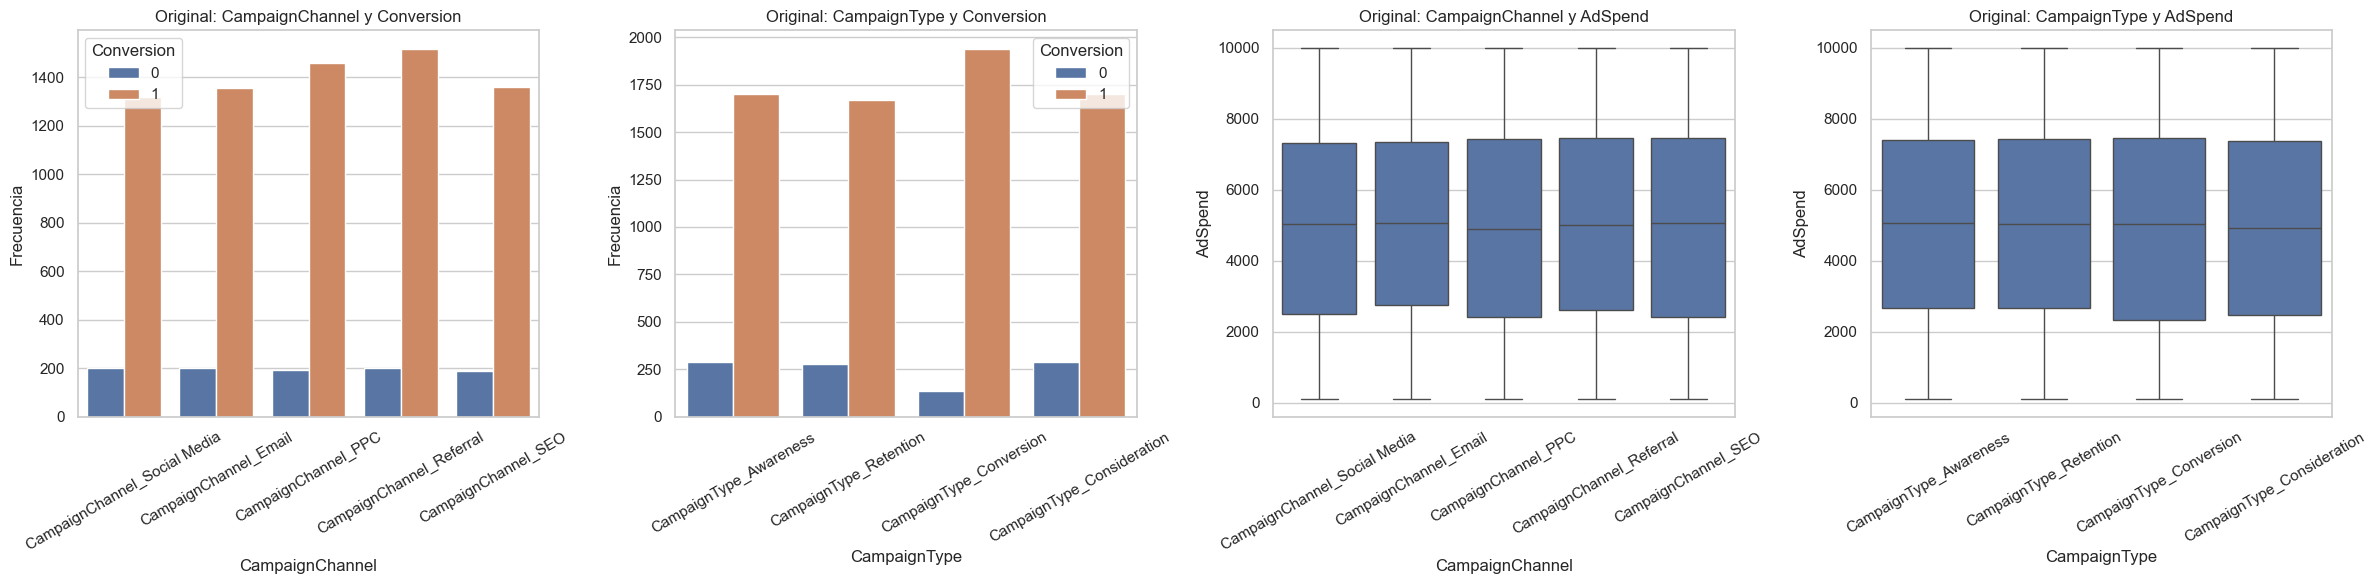

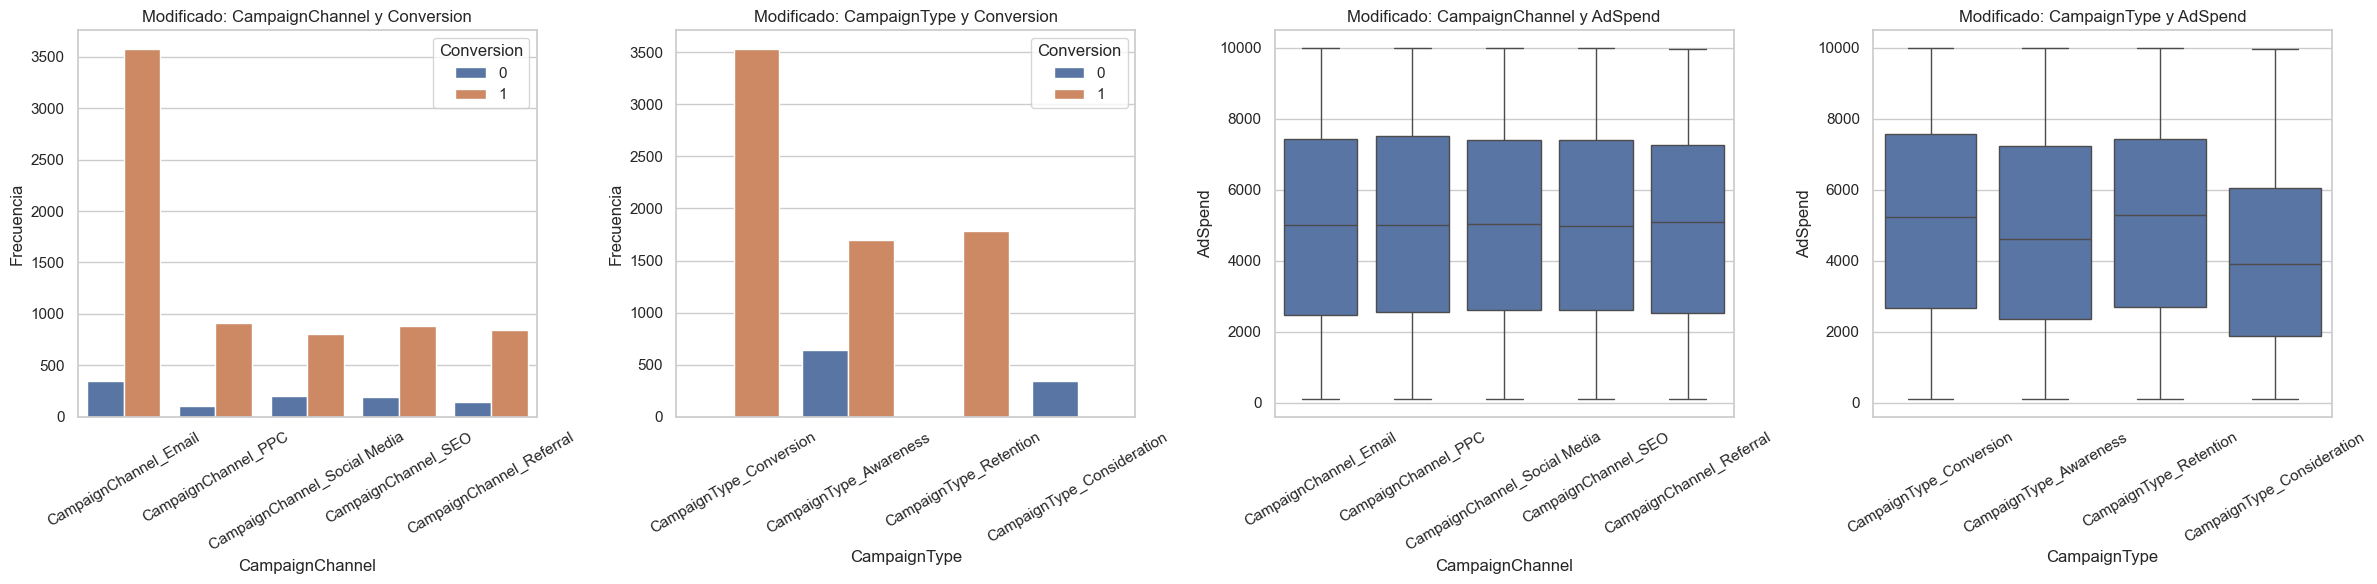

In [57]:
# --- Visualizaciones ---
def create_visualizations(df, title_prefix):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Una fila con 4 gráficos

    # Gráfico 1: Relación entre CampaignChannel y Conversion
    sns.countplot(data=df, x=df[["CampaignChannel_Email", "CampaignChannel_PPC",
                                 "CampaignChannel_Referral", "CampaignChannel_SEO",
                                 "CampaignChannel_Social Media"]].idxmax(axis=1),
                  hue="Conversion", ax=axes[0])
    axes[0].set_title(f"{title_prefix}: CampaignChannel y Conversion")
    axes[0].set_xlabel("CampaignChannel")
    axes[0].set_ylabel("Frecuencia")
    axes[0].tick_params(axis="x", rotation=30)

    # Gráfico 2: Relación entre CampaignType y Conversion
    sns.countplot(data=df, x=df[["CampaignType_Awareness", "CampaignType_Consideration",
                                 "CampaignType_Conversion", "CampaignType_Retention"]].idxmax(axis=1),
                  hue="Conversion", ax=axes[1])
    axes[1].set_title(f"{title_prefix}: CampaignType y Conversion")
    axes[1].set_xlabel("CampaignType")
    axes[1].set_ylabel("Frecuencia")
    axes[1].tick_params(axis="x", rotation=30)

    # Gráfico 3: Relación entre CampaignChannel y AdSpend
    sns.boxplot(data=df, x=df[["CampaignChannel_Email", "CampaignChannel_PPC",
                               "CampaignChannel_Referral", "CampaignChannel_SEO",
                               "CampaignChannel_Social Media"]].idxmax(axis=1),
                y="AdSpend", ax=axes[2])
    axes[2].set_title(f"{title_prefix}: CampaignChannel y AdSpend")
    axes[2].set_xlabel("CampaignChannel")
    axes[2].set_ylabel("AdSpend")
    axes[2].tick_params(axis="x", rotation=30)

    # Gráfico 4: Relación entre CampaignType y AdSpend
    sns.boxplot(data=df, x=df[["CampaignType_Awareness", "CampaignType_Consideration",
                               "CampaignType_Conversion", "CampaignType_Retention"]].idxmax(axis=1),
                y="AdSpend", ax=axes[3])
    axes[3].set_title(f"{title_prefix}: CampaignType y AdSpend")
    axes[3].set_xlabel("CampaignType")
    axes[3].set_ylabel("AdSpend")
    axes[3].tick_params(axis="x", rotation=30)

    plt.tight_layout()
    plt.show()

# Visualizaciones para datos originales y modificados
create_visualizations(df_encoded, "Original")
create_visualizations(df_encoded_uni, "Modificado")
